# **DATA BOOTCAMP**
# **SPRING2020 - COURSE PROJECT**

---



---


# **CREDIT RISK ANALYSIS AND MODELLING**
Group 13: Aishwarya Deokuliar (ald580), Daffney Deepa Viswanath(ddv246), Hardika Ganatra(hjg296)

---




![alt text](https://drive.google.com/uc?id=1loawz9kgpecxysE1fSJ1vTnxs4wt8WUK)

#**TABLE OF CONTENTS**
  I. PROJECT OVERVIEW

  II.DATA

  III. DATA UNDERSTANDING

    1.Import Libraries:
    2. Loading the Data
    3. Checking Dimensions
    4. Understanding columns in the Dataframe
    5. Description of the columns
IV. DATA CLEANING

    1. Parsing loan_status
    2.Removing the columns having more than 90% missing values
    3. Converting datatypes
      b) Earliest Credit Line (earliest_cr_line)
      c) Issue Date (issue_d)
V. EXPLORATORY DATA ANALYSIS AND DATA PRE-PROCESSING

    1.Delinquincy
    2.Loan Amount
    3.Interest Rate
    4.Grade and Subgrade
    5.Purpose
    6.Installment
    7.Home Ownership
    8.Term
    9.Annual Income
    10.Verification Status
    11.DEBT TO INCOME
VI. DATA PREPARATION:

    1. Target and Predictor Variable :
    2. LOAN STATUS- Good or Bad?
    3. Splitting Test and Train Data
    4. Weight of Evidence and Information Value
    Rules we followed for categorizing variable by WOE:-
        a) Discrete Variables: Categorizing by WOE
            i) Home Ownership, Address State and Grade:
            ii) Address State:
            iii) Verfication Status and Purpose:
        b) Continuous Variables: Categorizing by WOE
            i) Issue Date:
            ii) Interest Rate:
            iii) Funded Amount:
            iv) Earliest Reported Credit Line:
            v) Delinquincy for past 2 years:
            vi) Number of Inquiries in last 6 months:
            vii) Open Account:
            viii) Public Record:
            xi) Total Credit Account Factor:
            x) Borrower's Delinquint Accounts:
            xi) Total revolving high Credit Limit:
            xii) Annul Income:
            xiii) Month since Last delinquincy:
            xiv) Debt to Income Ration:
            xv) Term, Employee Length and Installment
        c)Test Data Preparation:
VI. FEATURE SELECTION FOR MODEL BUILDING:

VII. MODELLING

    Model 1: Logistic Regression
      Model Evaluation - Cross-validation
    Model 2: Naive Bayes
      Model Evaluation- Cross Validation
    Model 3:DecisionTree Classifier
      Model Evaluation: Cross Validation
    AUC Scores of all models
      Logistic Regression Model
      Naive Bayes:
      Decision Tree Classifer:
VIII. MODEL COMPARISON:

IX. CONCLUSION:

REFERENCE:





# **I. PROJECT OVERVIEW**

---



---


 
**WHAT IS CREDIT RISK?**

A creditor or the lender provides goods and services to a debtor also known borrowers based on the trust that borrower will repay. When someone fails to repay a loan,it is said to be default.The possiblity that someone who has borrowed money will default is known as Credit Risk.

**WHY IT IS IMPORTANT?**

Lender's inability or failure to estimate borrowers probablity of default can have grave consequences for lenders and the investor.In general, lending to borrowers with a high probability of default is one of the main reasons for serious financial crisis. One such finacial crisis was the global financial crisis in 2008.The main factor that led to the crisis was high default rates of subprime home mortgages. Many big banks like Lehmam Brothers and Bear Stearns went bankrupt thus making credit risk analysis as one of the most important variables in the Financial System of today.

**SCOPE OF THE PROJECT:**
It is important to be able to estimate credit risk of each borrower as precisely as possible.Hence, our project focuses on modelling three different classification models namely Logistic Regression, Naive Bayes, and Decision Tree.Our goal is to determine whether a borrower will default or not on the basis of several factors such as income, age, location and interest rate. We will also compare the three models to determine the best model on the basis of AUC score and cross validation score.

# **II.DATA**


---



---



The dataset is sourced from Kaggle. The data files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables. 

Data Source:  https://www.kaggle.com/wendykan/lending-club-loan-data

In [0]:
#When opening in google colab, run this cell to increase RAM usage to 25GB
#a = []
#while(1):
 #   a.append(1)

In [0]:
#If opening in colab run this cell
##!git clone https://github.com/ddv246/Lending-Club
##%cd Lending-Club

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **III. DATA UNDERSTANDING**

---



---



Description of various columns in the dataset. Importing necessary Libraries and loading the data.


#### **1.Import Libraries:**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **2. Loading the Data**


In [0]:
start_df = pd.read_csv('/content/drive/My Drive/loan_data_2007_2014.csv')

In [4]:
df = start_df.copy(deep=True)
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **3. Checking Dimensions**


In [5]:
df.shape

(466285, 75)

#### **4. Understanding columns in the Dataframe**

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

####**5. Description of the columns**

The entire description of the columns can be found here. 

https://s.docworkspace.com/d/ADBfv_XF6v8rodmIisudFA

# **IV. DATA CLEANING**

---



---



#### **1. Parsing loan_status**

In [7]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

#### **2.Removing the columns having more than 90% missing values**

In [8]:
# summarising number of missing values in each column
df.isnull().sum().sort_values()

Unnamed: 0               0
zip_code                 0
addr_state               0
dti                      0
revol_bal                0
                     ...  
open_acc_6m         466285
total_cu_tl         466285
annual_inc_joint    466285
dti_joint           466285
inq_last_12m        466285
Length: 75, dtype: int64

In [9]:
# percentage of missing values in each column
perc=round(df.isnull().sum()/len(df.index), 2)*100
perc=perc.sort_values().tail(30)
perc

purpose                          0.0
verification_status              0.0
title                            0.0
emp_length                       5.0
emp_title                        6.0
tot_cur_bal                     15.0
tot_coll_amt                    15.0
total_rev_hi_lim                15.0
next_pymnt_d                    49.0
mths_since_last_delinq          54.0
desc                            73.0
mths_since_last_major_derog     79.0
mths_since_last_record          87.0
il_util                        100.0
all_util                       100.0
max_bal_bc                     100.0
open_rv_24m                    100.0
open_rv_12m                    100.0
inq_fi                         100.0
total_bal_il                   100.0
total_cu_tl                    100.0
open_il_24m                    100.0
open_il_12m                    100.0
open_il_6m                     100.0
open_acc_6m                    100.0
verification_status_joint      100.0
dti_joint                      100.0
a

We see that many columns have 100% missing values, some have 87%, 79% etc. First, let's get rid of the columns having 100% missing values.

In [10]:
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 90]
print(missing_columns)

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')


In [11]:
df = df.drop(missing_columns, axis=1)
print(df.shape)

(466285, 58)


Summarise number of missing values again

In [12]:
100*(df.isnull().sum()/len(df.index)).sort_values()

Unnamed: 0                      0.000000
policy_code                     0.000000
purpose                         0.000000
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
last_pymnt_amnt                 0.000000
collection_recovery_fee         0.000000
recoveries                      0.000000
total_rec_late_fee              0.000000
total_rec_int                   0.000000
total_rec_prncp                 0.000000
total_pymnt_inv                 0.000000
revol_bal                       0.000000
total_pymnt                     0.000000
out_prncp_inv                   0.000000
url                             0.000000
initial_list_status             0.000000
pymnt_plan                      0.000000
issue_d                         0.000000
id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv 

The data looks clean by and large. Let's also check whether all columns are in the correct format.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### **3. Converting datatypes**
#### **a) Employee length (emp_length)**

Employee length is of type object, which we need to be as numeric. Converting them to numeric values

In [14]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [0]:
# Removing years from emp_length
df['emp_length'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace('n/a',  str(0))
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')

In [0]:
#changing emp_length to numeric
df['emp_length'] = pd.to_numeric(df['emp_length'])

In [17]:
# simlilarly changing term variable to numeric
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [0]:
df['term'] = df['term'].str.replace('months','')

In [19]:
df['term'] = pd.to_numeric(df['term'])
df['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64

#### **b) Earliest Credit Line (earliest_cr_line)** 

Attributes like 'earliest_cr_line' and 'issue_d' are of type object and are required to be datatype datetime . Thus, cleaning them to be of the required type.

In [20]:
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [21]:
##Converting to datetime format
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
df['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

Observing the data, we find that we need to calculate the time since the earlist credit line as passed in the form of months. So, we make use of the  reference date , 2017-12-01, to calculate the time

In [0]:
## We take the reference date and calulate the time since earliest credit line has passed in months
df['month_diff_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line']) / np.timedelta64(1, 'M')))

However, we see that the Dates from 1969 and before, were not converted in the format we require. They have become 2069 and similar. Those strange values need to be changed, for which we have set the rows that have negative differences to the maximum value.

In [23]:
# Dates from 1969 and before are not being converted well,they have become 2069 and similar
df['month_diff_earliest_cr_line'].describe()


count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: month_diff_earliest_cr_line, dtype: float64

In [0]:
#There are 1169 such strange value.
df.loc[df['month_diff_earliest_cr_line'] < 0].count()
# Hence,we set the rows that had negative differences to the maximum value.
df['month_diff_earliest_cr_line'][df['month_diff_earliest_cr_line'] < 0] = df['month_diff_earliest_cr_line'].max()


#### **c) Issue Date (issue_d)** 

Simlarly, for the column issue_d, we convert it to datatime format and take the reference date to calculate the time since the earliest credit line has passed.

In [0]:
df['issue_d']
##Converting to datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
#### We take the reference date and calulate the time since earliest credit line has passed in months
df['month_diff_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d']) / np.timedelta64(1, 'M')))
df['month_diff_issue_d'][df['month_diff_issue_d'] < 0] = df['month_diff_issue_d'].max()

One hot encoding by creating dummy variables for categorical variables.

In [0]:
loan_dummies= [pd.get_dummies(df['grade'], prefix = 'grade', prefix_sep = ':'),
               pd.get_dummies(df['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
               pd.get_dummies(df['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
               pd.get_dummies(df['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
               pd.get_dummies(df['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
               pd.get_dummies(df['purpose'], prefix = 'purpose', prefix_sep = ':'),
               pd.get_dummies(df['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
               pd.get_dummies(df['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]
loan_dummies = pd.concat(loan_dummies, axis = 1)
df= pd.concat([df, loan_dummies], axis = 1)


# **V. EXPLORATORY DATA ANALYSIS AND DATA PRE-PROCESSING**

---

---



---



Exploratory Data Analysis, or EDA, is an integral part of understanding the credit risk analysis. Before moving towards modelling, it's vital to become familiar with different relationships within the data. Analyzing these relationships will provide intuition about how to interpret the results of the proceeding models. Asking questions about these relationships beforehand might also supply additional knowledge about relationships that we might have not known existed. This section will further investigate the distribution of data and ask specific questions about the information lying inside the dataset.


We'll inspect each feature individually, and do the following:

1.Drop the feature if it is not useful for predicting the loan status.

2.View summary statistics and visualize the data, plotting against the loan status.

3.Modify the feature to make it useful for modeling, if necessary.

We define a function for plotting a variable and comparing with the count and loan status:

In [0]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'loan_status', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend(bbox_to_anchor=(1.04,1), loc="upper left") 
        
    else:
        fig = plt.figure(figsize=(12,3))
        g=sns.countplot(x=col_name, hue='loan_status', data=df , order=sorted(df[col_name].unique()))
        g.legend_.remove()
        fig.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        
    plt.tight_layout()

## **1.Delinquincy**
#### **Loan Status**

---
 **Data Dictionary:** Current status of the loan

Delinquency happens when a borrower fails to pay the minimum amount for an outstanding debt.

According to the definitions used by Lending Club.

*   **Charged Off** — defaulted loans for which there is no expectation from the lender in recovering the debt
*   **Default** — borrower has failed to pay his obligations for more than 120 days
*   **Late** — borrower has failed to pay his obligations for 31 to 120 days
*   **Grace Period** — borrower still has time to pay his obligations without being considered delinquent
*   **Late** — payment is late by 16 to 30 days

In [28]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

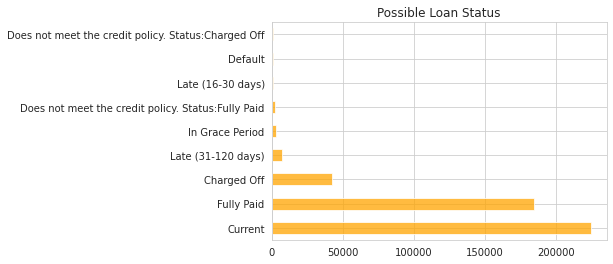

In [29]:
df['loan_status'].value_counts().plot(kind= 'barh', color = 'orange', title = 'Possible Loan Status', alpha = 0.75)
plt.show()

**Inference :**  We can see that most of the data are of "current" loan status.

## **2.Loan Amount**

---




#### **Data Dictionary:** The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [30]:
df['loan_amnt'].describe()

count    466285.000000
mean      14317.277577
std        8286.509164
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [31]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42475.0,14518.758682,8373.184813,900.0,8000.0,12600.0,20000.0,35000.0
Current,224226.0,15177.366474,8420.944275,1000.0,8875.0,14000.0,20000.0,35000.0
Default,832.0,15284.885817,8311.439119,1000.0,9600.0,13675.0,20000.0,35000.0
Does not meet the credit policy. Status:Charged Off,761.0,9527.233903,6404.598723,500.0,5000.0,7750.0,12000.0,25000.0
Does not meet the credit policy. Status:Fully Paid,1988.0,8853.231891,6163.442950,500.0,4000.0,7200.0,12000.0,25000.0
Fully Paid,184739.0,13214.394226,7949.030252,500.0,7125.0,11800.0,18000.0,35000.0
In Grace Period,3146.0,16128.289892,8550.986001,1000.0,10000.0,15000.0,21000.0,35000.0
Late (16-30 days),1218.0,15800.779967,8737.787075,1000.0,9687.5,14400.0,21000.0,35000.0
Late (31-120 days),6900.0,15553.757246,8396.213429,1000.0,9600.0,14000.0,20000.0,35000.0


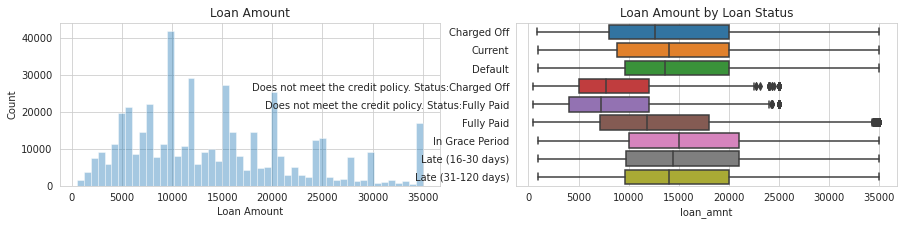

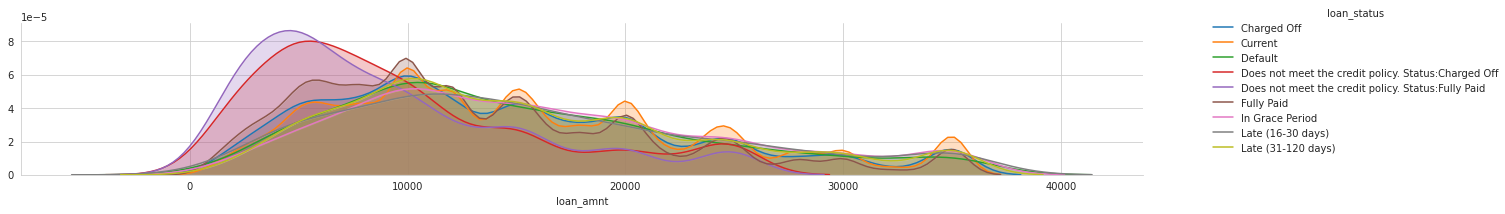

In [32]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

**Inference:** Loan amount ranges from 500 to 35000 with a mean of 13520. Comparing the summary statistics of loan status, we see that fully paid loans seems to have higher loan amount. However, we will dig deeper into this in later analysis.

## **3.Interest Rate**

---



---



#### **Data Dictionary:** "Interest Rate on the loan."

In [33]:
df['int_rate'].describe()

count    466285.000000
mean         13.829236
std           4.357587
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64

In [34]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42475.0,15.998834,4.290310,5.42,13.0600,15.80,18.9200,26.06
Current,224226.0,13.773271,4.325749,6.00,10.9900,13.65,16.2900,26.06
Default,832.0,16.136394,4.032109,6.49,13.3500,15.80,18.9900,26.06
Does not meet the credit policy. Status:Charged Off,761.0,14.597148,2.664766,7.43,12.8700,14.50,16.3200,21.64
Does not meet the credit policy. Status:Fully Paid,1988.0,13.978642,2.732150,6.00,12.3975,13.98,15.6800,21.64
Fully Paid,184739.0,13.255943,4.242014,5.42,10.1600,13.11,15.8000,26.06
In Grace Period,3146.0,15.827072,4.365028,6.00,12.9900,15.61,18.9200,26.06
Late (16-30 days),1218.0,15.964466,4.248670,6.03,12.9900,15.61,18.9725,26.06
Late (31-120 days),6900.0,15.947754,4.192149,6.00,12.9900,15.61,18.7500,26.06


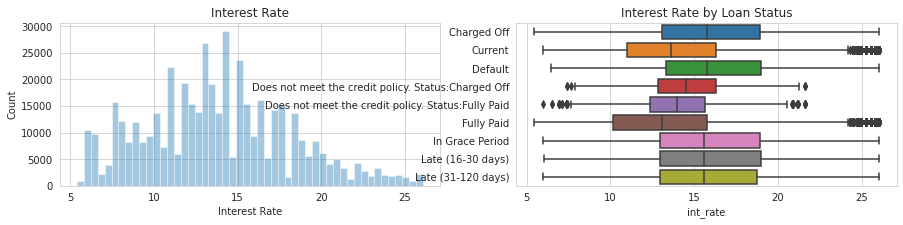

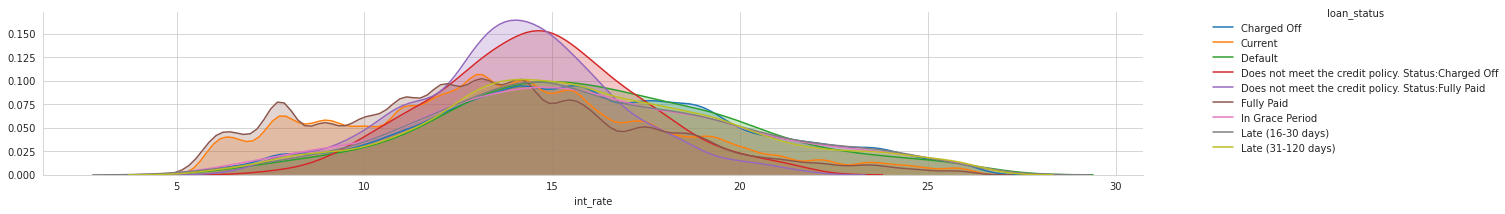

In [35]:
plot_var('int_rate', 'Interest Rate', continuous=True)

**Description:** From the description, Interest rate ranges from a maximum of 26% to a minimum of 5.4%. Comparing the summary statistics of Interest Rate and the graph,we can infer that the higher the interest rate is, the more likely for it to be charged off.

## **4.Grade and Subgrade**

---



**Data Description:** Loan Grades and Subgrades are assigned by Lending Club based on the borrower’s credit worthiness and also on some variables specific to that Loan.



In [0]:
grade_vis = df['grade'].value_counts()

Plotting the values

Text(0.5, 0, 'Count')

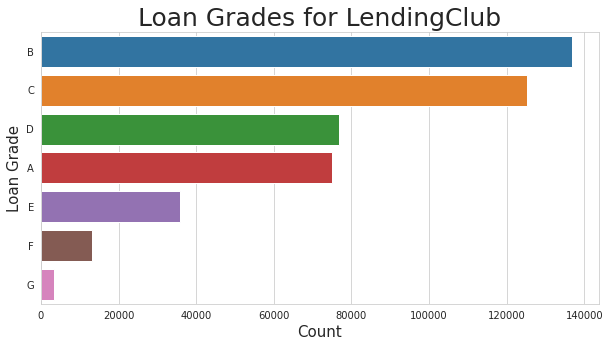

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(y=grade_vis.index, x=grade_vis)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

We see that majority of the loans are either in grade B or grade C, which together corresponds to about 50% of the loan population.

While there are a considerable amount of loans in Grade D and in Grade A, there is quite a small amount in Grade G which corresponds to uncollectible loans. 

This gives a good sign that Lending Club has less of uncollectible loans.


Looking more closely into Grade and Sub_Grade,

In [38]:
print(sorted(df['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [39]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


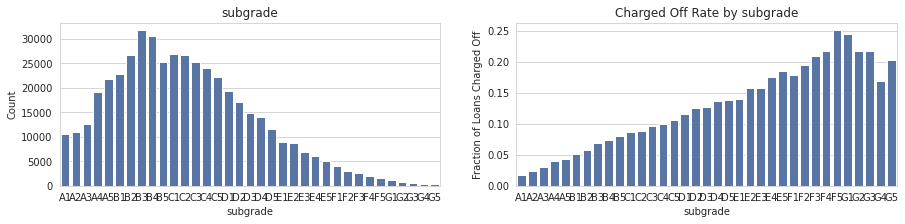

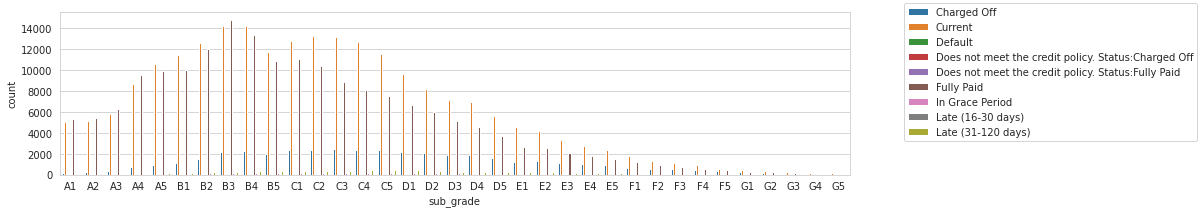

In [40]:
plot_var('sub_grade','subgrade',continuous=False)

**Inference:** from the above, we see that the grade is implied by subgrade.We can see a  trend of higher fraction of loans Charged off as the grade going from A to G though there are small variations among subgrades.

## **5.Purpose**

---



**Data Description:** Why are people requesting Loan? What were the most frequent loan purpose


We will segment the loan applications across the purpose of the loan. Purpose of the Loan seems to be affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

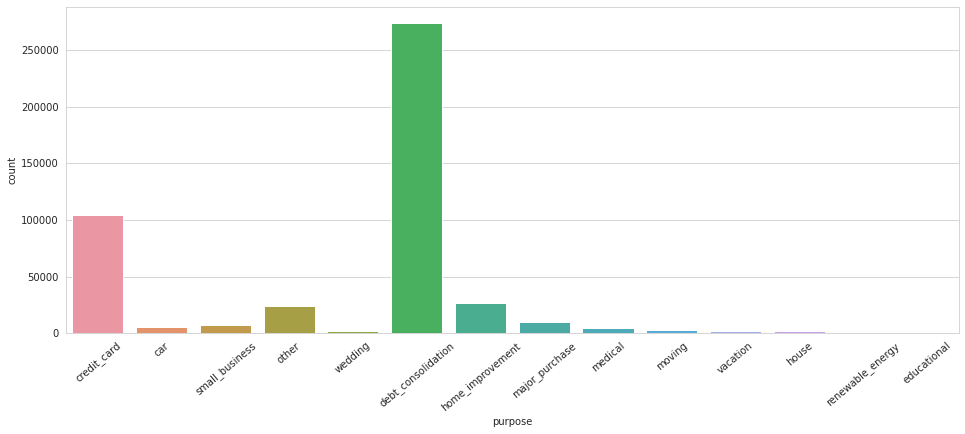

In [41]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
plt.xticks(rotation=40)
sns.countplot(x='purpose', data=df)
plt.show()

From the above graph we can see that debt consolidation is a clear winner for loan purpose with more than 1600k loans, followed by credit card loans and so on

Top 3 Loan Purpose 

*   Debt Consolidation
*   Credit Card Loans
*   Home Improvement


Let's analyse the top 3 types of loans based on purpose:

In [42]:
main_purposes = ["credit_card","debt_consolidation","home_improvement"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
Name: purpose, dtype: int64

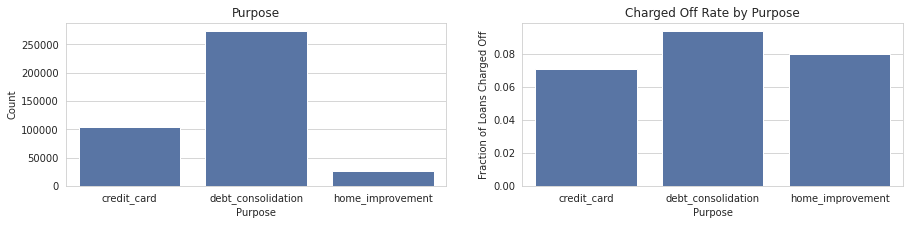

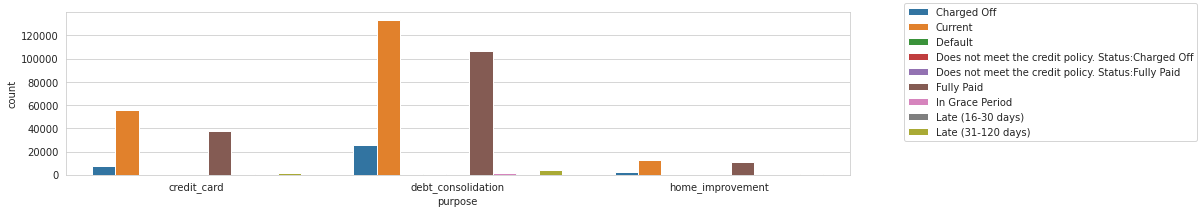

In [43]:
plot_var('purpose','Purpose',continuous=False)

**Inference:** We see that the highest fraction of loans that were charged off were due to debt consolidation purpose. Also, the borrowers with current loan status seem to have the highest count of debt consolidation. 

## **6.Installment**

---

**Data Dictionary:** "The monthly payment owed by the borrower if the loan originates."

In [44]:
df['installment'].describe()

count    404889.000000
mean        449.459423
std         239.661374
min          16.730000
25%         275.330000
50%         398.090000
75%         583.510000
max        1407.010000
Name: installment, dtype: float64

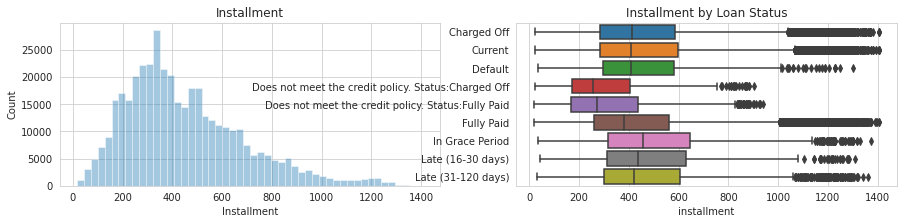

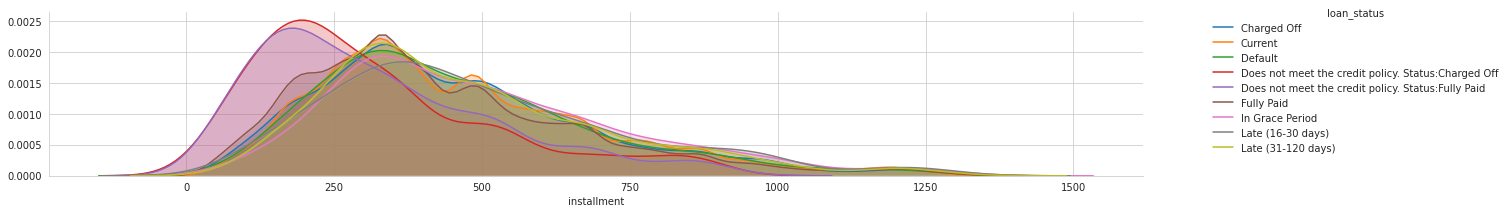

In [45]:
plot_var('installment', 'Installment', continuous=True)

In [46]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,35341.0,458.235627,241.277270,21.62,285.7800,410.660,586.9100,1407.01
Current,201479.0,460.945873,238.782799,22.24,285.4200,409.870,598.8900,1407.01
Default,735.0,460.535891,232.582987,33.21,294.6950,410.480,582.4900,1300.20
Does not meet the credit policy. Status:Charged Off,432.0,314.112662,201.477917,23.21,169.9425,256.835,404.6825,902.06
Does not meet the credit policy. Status:Fully Paid,1222.0,318.948592,200.173174,16.73,169.2750,271.395,435.4775,940.14
Fully Paid,155686.0,431.750421,238.994682,20.22,260.4900,381.030,559.4400,1407.01
In Grace Period,2794.0,499.482713,247.333287,32.74,316.4700,456.540,646.6725,1374.63
Late (16-30 days),1053.0,490.692156,252.075999,41.60,313.3000,436.740,629.2500,1309.49
Late (31-120 days),6147.0,475.363958,240.195816,31.52,300.8650,421.950,606.4100,1362.70


**Inference:** Installment amount ranges from a maximum of 1407 to minimum of 16.73. Charged-off loans tend to have higher installments but the difference of the mean values is very small

## **7.Home Ownership**

---


**Data Dictionary:** "The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER."

In [47]:
df['home_ownership'].value_counts()

MORTGAGE    211162
RENT        158007
OWN          35557
OTHER          119
NONE            43
ANY              1
Name: home_ownership, dtype: int64

Replace "ANY" & "None" with "OTHER".

In [0]:
df['home_ownership'].replace(['NONE','ANY'],'OTHER', inplace=True)

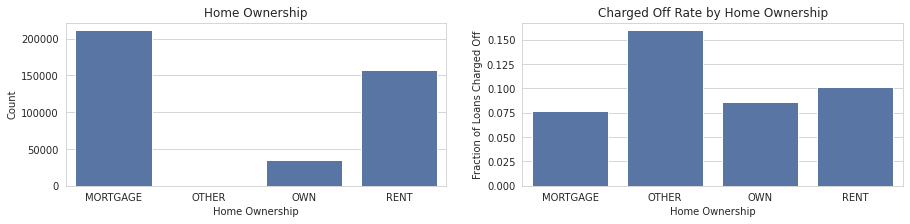

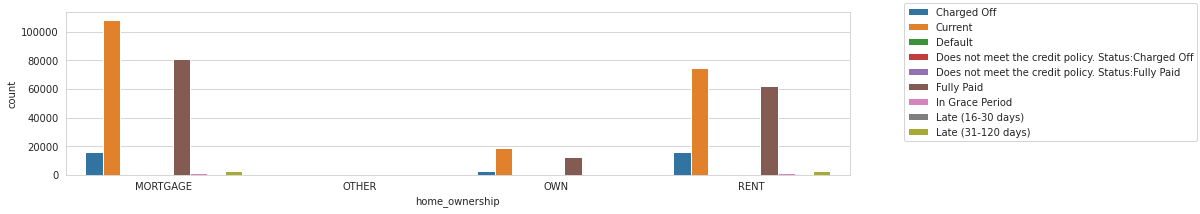

In [49]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

In [50]:
df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.077069
OTHER       0.159509
OWN         0.085918
RENT        0.101173
Name: loan_status, dtype: float64

**Inference:** There appear to be small differences in charge-off rates by home ownership status. Mortgage & OTHER has slightly less probability of Charged-Off. Because of the large numbers of observations in each category, these differences might be statistically significant.

## **8.Term**

---
**Data Dictionary:** "The number of payments on the loan. Values are in months and can be either 36 or 60."


In [51]:
df['term'].value_counts(dropna=False)

36    289175
60    115714
Name: term, dtype: int64

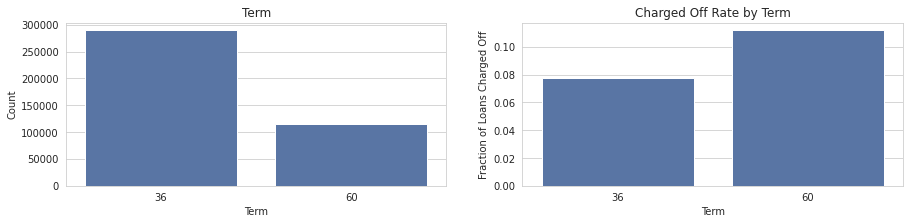

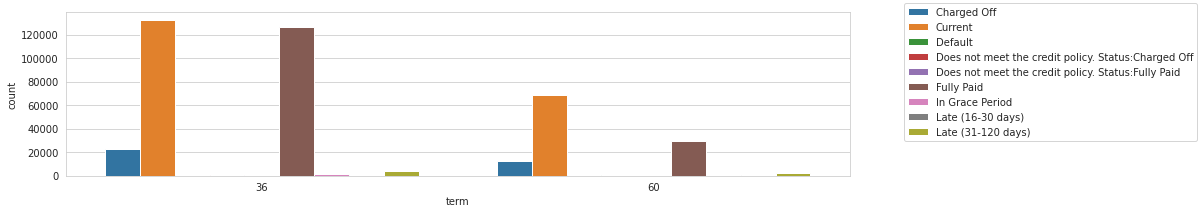

In [52]:
plot_var('term', 'Term', continuous=False)

In [53]:
df['term'].value_counts(normalize=True)

36    0.714208
60    0.285792
Name: term, dtype: float64

**Inference:** About 71% of the loans are 36 months and the rest are 60 months. The latter tends to have lower fraction of being fully paid.



## **9.Annual Income**

---
**Data Dictionary:** "The self-reported annual income provided by the borrower during registration."


In [54]:
df['annual_inc'].describe()

count    4.048890e+05
mean     7.351384e+04
std      5.370064e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.350000e+04
75%      8.900000e+04
max      7.446395e+06
Name: annual_inc, dtype: float64

In [0]:
df['annual_inc'] = df['annual_inc'].apply(lambda x:np.log10(x+1))

In [56]:
df['annual_inc'].describe()

count    404889.000000
mean          4.805960
std           0.222048
min           3.278067
25%           4.653222
50%           4.802781
75%           4.949395
max           6.871946
Name: annual_inc, dtype: float64

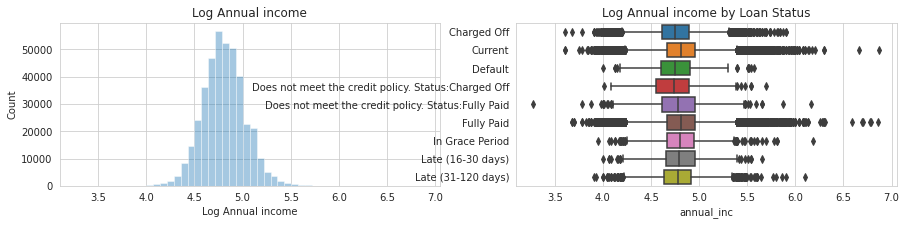

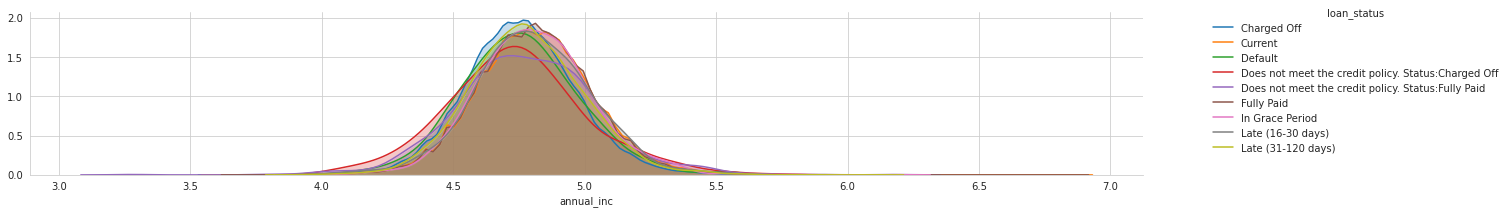

In [58]:
plot_var('annual_inc', 'Log Annual income', continuous=True)

**Inference:** Annual income ranges from \$1 to \$7.5M, with a median at \$63k, which doubles the national median individual income in the US (\$40k for males and \$25k for females). Due to the large range of variation, we log-transform the values. We can see that there are more number of outliers on the lower ends. 



## **10.Verification Status**

---
**Data Dictionary:** "Indicates if income was verified by [Lending Club], not verified, or if the income source was verified."


In [59]:
df['verification_status'].value_counts()

Verified           147779
Source Verified    132086
Not Verified       125024
Name: verification_status, dtype: int64

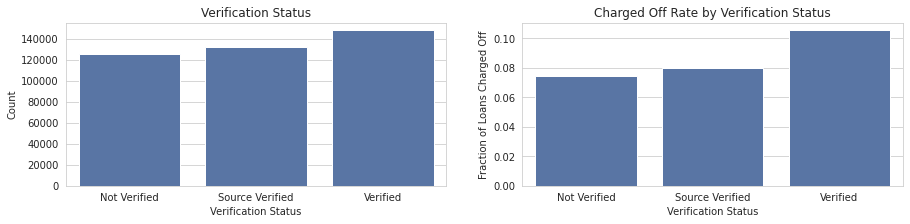

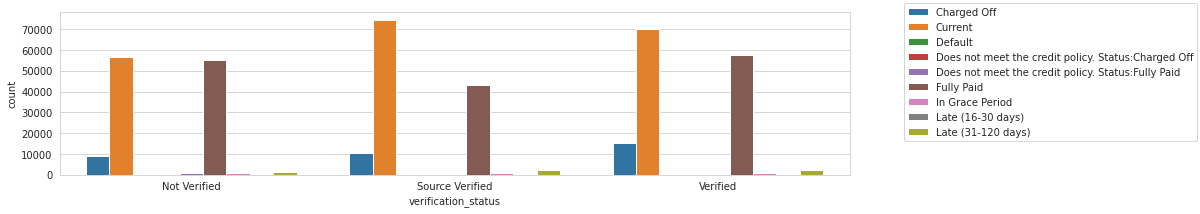

In [60]:
plot_var('verification_status', 'Verification Status', continuous=False)

**Inference:** Surprisingly, verified loans have higher chance of being charged-Off.

## **11.DEBT TO INCOME**

---


**Data Dictionary:** "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.""

In [61]:

df['dti'].describe()

count    404889.000000
mean         17.599636
std           7.724312
min           0.000000
25%          11.820000
50%          17.230000
75%          23.080000
max          39.990000
Name: dti, dtype: float64

No handles with labels found to put in legend.


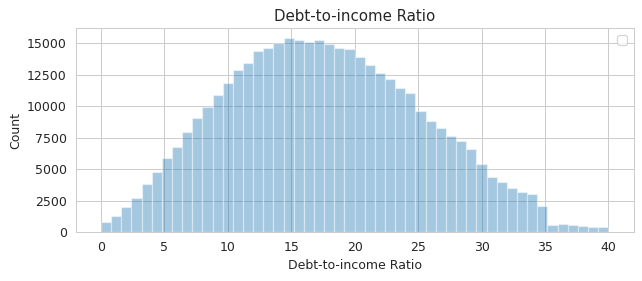

In [62]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(df.loc[df['dti'].notnull() & (df['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')
plt.legend(loc='best')

In [63]:
df.groupby('loan_status')['dti'].median()

loan_status
Charged Off                                            18.750
Current                                                17.860
Default                                                19.370
Does not meet the credit policy. Status:Charged Off    15.525
Does not meet the credit policy. Status:Fully Paid     15.985
Fully Paid                                             16.040
In Grace Period                                        19.035
Late (16-30 days)                                      18.680
Late (31-120 days)                                     19.120
Name: dti, dtype: float64

**Inference:** From the plot, we can see that there are fewer count when debt to income ratio is 40 and no outliers after that. Then we see how are the Charged off loans wrt Debt to income ratio.Default value is the highest. From this we can infer that the borrowers with highest debt to income ratio were defaulters.

**Checking Correlation between the few business features.**

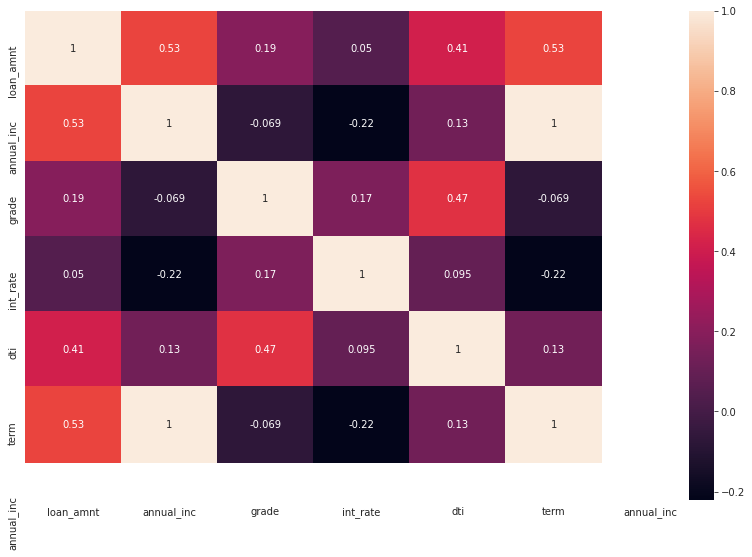

In [64]:
cor_df=df[['loan_amnt','annual_inc', 'grade','int_rate', 'dti', 'term','annual_inc']]
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(cor_df.corr(), 
            xticklabels=cor_df.columns.values,
            yticklabels=cor_df.columns.values,annot= True)
plt.show()

#**VI. DATA PREPARATION:**

---



---



**"If you torture the data long enough, it will confess to anything"**

 That being said, along with all the insights gained from data cleaning, data analysis, Lets step into the next phase of credit risk analysis or might as well say, second phase of data torture - DATA PREPARATION 


## **1. Target and Predictor Variable :**

---
Dependent or Target variable - what we are going to predict. In our case, Loan Status.


Predictor variable - One or more variables that are used to determine(Predict) the 'Target Variable'.

Approach for constructing Independent Variable

1. **Fine classing :-** we will use fine classing method for turning continous variables into categories by bundling them up by there properties   

2. **Weight of Evidence :-** To what extent an independent variable would predict a dependent variable  
   **WOE = ln(% non default events/% default events)**
3.**Coarse classing :-** We will bundle variables that have similar weight of evidence
4.**Information Value:-** It calculates the prediction power of a feature


## **2. LOAN STATUS- Good or Bad?**

---

We are interested in the borrowers and the respective loans on which they have defaulted or not. Lets call the loans that have defaulted as bad loand and those which did not, as good loans thus making it imperative for us to decribe what default is. We will create a new variable in the data set of a boolean or binary type.Zero will stand for default or bad loan while one for a good loan.

The established practice is to categorize all the independent variables into the binary variables(dummy variables) or indicator variables.This kind data preparation makes it more understandable even people to layman. 

In [65]:
df['loan_status'].unique()

[Fully Paid, Current, Charged Off, Default, Late (31-120 days), In Grace Period, Late (16-30 days), Does not meet the credit policy. Status:Charge..., Does not meet the credit policy. Status:Fully ...]
Categories (9, object): [Fully Paid, Current, Charged Off, Default, ..., In Grace Period,
                         Late (16-30 days), Does not meet the credit policy. Status:Charge...,
                         Does not meet the credit policy. Status:Fully ...]

In [0]:
bad_loans = ['Charged Off', 'Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']
df['good_bad'] = np.where(df['loan_status'].isin(bad_loans), 0, 1)

## **3. Splitting Test and Train Data**

In [0]:

loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(df.drop('good_bad', axis = 1), df[['good_bad']], test_size = 0.2, random_state = 50)

<font color='red'>Note: It is required to re-run data processing step for test data so that we have same set of binary dummy variables as that of train data set. To do data processing for test data set, please un-comment test data code and comment train data code </font>

**Train Data: (Comment when running Test Data)**

In [0]:
df_inputs = loan_data_inputs_train
df_targets = loan_data_targets_train

**Test Data: (Comment it when running Training Data)**

In [0]:
#df_inputs = loan_data_inputs_test
#df_targets = loan_data_targets_test

##  **4. Weight of Evidence and Information Value**

---

The weight of evidence tells the predictive power of of the target variable in relation to the predictor variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. 

WOE = In(% of non-events ➗ % of events)

Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :

IV = ∑ (% of non-events - % of events) * WOE



 Please refer to the below link know more about WOE and Information Value
 
 https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

In [0]:
def get_woe_discrete(df,column_name, good_bad_variable_df):
    df = pd.concat([df[column_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'total_obs', 'prop_good']
    df['prop_total_obs'] = df['total_obs'] / df['total_obs'].sum()
    df['total_good'] = df['prop_good'] * df['total_obs']
    df['total_bad'] = (1 - df['prop_good']) * df['total_obs']
    df['prop_total_good'] = df['total_good'] / df['total_good'].sum()
    df['prop_total_bad'] = df['total_bad'] / df['total_bad'].sum()
    df['WoE'] = np.log(df['prop_total_good'] / df['prop_total_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['IV'] = (df['prop_total_good'] - df['prop_total_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [0]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'b')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

##### Rules we followed for categorizing variable by WOE:-  
1. Each category (bin) should have at least 5% of the observations. 
2. Each category (bin) should be non-zero for both non-events and events.  
3. The WOE should be distinct for each category. Similar groups should be aggregated.  
4. The WOE should be monotonic, i.e. either growing or decreasing with the groupings.  
5. Missing values are binned separately.  

In [123]:
# Here we are going to calculate weight of evidence
df_temp = get_woe_discrete(df_inputs, 'grade', df_targets)
df_temp.set_index('grade')

,total_obs,prop_good,prop_total_obs,total_good,total_bad,prop_total_good,prop_total_bad,WoE,IV
grade,,,,,,,,,
G,478,0.719665,0.005903,344.0,134.0,0.004751,0.015640,-1.191508,0.30623
F,1939,0.748840,0.023945,1452.0,487.0,0.020052,0.056839,-1.041877,0.30623
E,5773,0.809111,0.071291,4671.0,1102.0,0.064508,0.128618,-0.690064,0.30623
D,12731,0.847616,0.157216,10791.0,1940.0,0.149026,0.226424,-0.418286,0.30623
C,22396,0.884846,0.276569,19817.0,2579.0,0.273678,0.301004,-0.095172,0.30623
B,24640,0.924310,0.304280,22775.0,1865.0,0.314528,0.217670,0.368092,0.30623
A,13021,0.964596,0.160797,12560.0,461.0,0.173457,0.053805,1.170564,0.30623


### **a) Discrete Variables: Categorizing by WOE**

---


#### **i) Home Ownership, Address State and Grade:**

---



Text(0, 0.5, 'Weight of evidence')

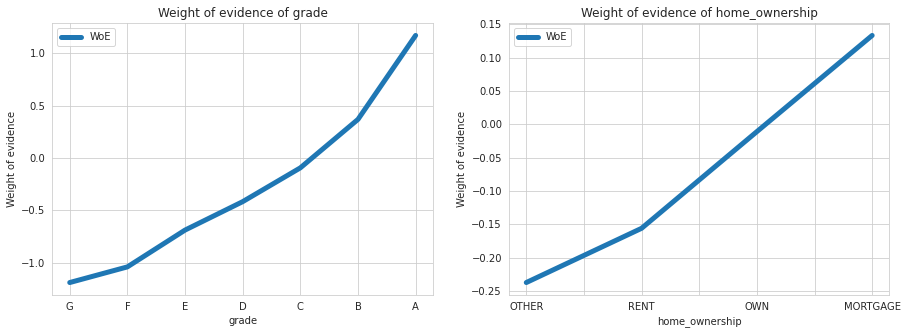

In [124]:
fig,(ax1,ax2) = plt.subplots(1,2)
## calculating woe and plotting for grade
df_temp.plot(ax=ax1,x = 'grade',y='WoE',lw=5,figsize=(15,5))
ax1.set_title('Weight of evidence of grade')
ax1.set_ylabel('Weight of evidence')
## Calculating weight of evidence and plotting for home ownership
df_temp = get_woe_discrete(df_inputs, 'home_ownership', df_targets)
df_temp.set_index('home_ownership')
df_temp.plot(ax = ax2,x = 'home_ownership',y='WoE',lw=5)
ax2.set_title('Weight of evidence of home_ownership')
ax2.set_ylabel('Weight of evidence')

In [0]:
# reference category 'home_ownership:RENT_OTHER_NONE' ,
#other categories'home_ownership:OWN','home_ownership:MORTGAGE'
df_inputs['home_ownership:RENT_OTHER_NONE'] = sum([df_inputs['home_ownership:RENT'], df_inputs['home_ownership:OTHER'],
                                                      df_inputs['home_ownership:NONE']])

**Observation:** 
**WOE** :Based on weight of evidence we must decide how to organize the catagories of discrete variables into dummy variables. we will take reference category having the highest default rate. 

From the above graph, we can conclude that individuals in Grade:G are bad borrowers.

**Coarse classing :** When doing so with the home_ownership according to Weight of EvidenceRent,None,other has high default rate. Hence, we keep them as reference category and combine them into one category.

We have three category of home_ownership:RENT_OTHER_NONE, OWN and MORTGAGE.

#### **ii) Address State:**

---



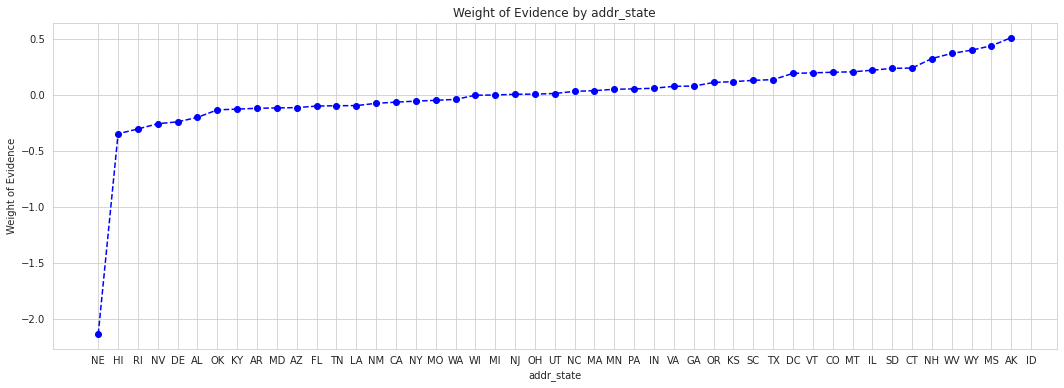

In [126]:
df_temp = get_woe_discrete(df_inputs, 'addr_state', df_targets)
plot_by_woe(df_temp)


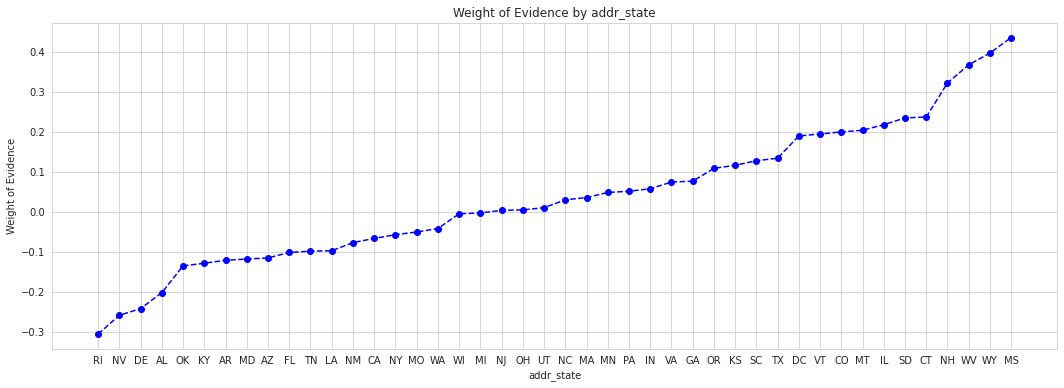

In [127]:
plot_by_woe(df_temp.iloc[2: -2, : ])

In [0]:
#plot_by_woe(df_temp.iloc[4: -3, : ])

In [0]:
#reference category
df_inputs['addr_state:NE_IA_NV_FL_HI_AL'] = sum([df_inputs['addr_state:NE'],
                                              df_inputs['addr_state:IA'], df_inputs['addr_state:NV'],
                                              df_inputs['addr_state:FL'], df_inputs['addr_state:HI'],
                                                          df_inputs['addr_state:AL']])
df_inputs['addr_state:NY_MO_MD_NJ_CA_LA_RI_VA'] = sum([df_inputs['addr_state:NY'], df_inputs['addr_state:MO'],
                                              df_inputs['addr_state:MD'], df_inputs['addr_state:NJ'],
                                              df_inputs['addr_state:CA'], df_inputs['addr_state:LA'],
                                                          df_inputs['addr_state:RI'],df_inputs['addr_state:VA']])
df_inputs['addr_state:UT_NC_AR_AZ_PA_DE_TN_OH_SD'] = sum([df_inputs['addr_state:UT'], df_inputs['addr_state:NC'],
                                              df_inputs['addr_state:AR'], df_inputs['addr_state:AZ'],
                                              df_inputs['addr_state:PA'], df_inputs['addr_state:DE'],
                                              df_inputs['addr_state:TN'],df_inputs['addr_state:OH'],
                                              df_inputs['addr_state:SD']])
df_inputs['addr_state:MI_IN_MN_KY_WI_MA_GA_WA_OR'] = sum([df_inputs['addr_state:MI'], df_inputs['addr_state:IN'],
                                              df_inputs['addr_state:MN'], df_inputs['addr_state:KY'],
                                              df_inputs['addr_state:WI'], df_inputs['addr_state:MA'],
                                              df_inputs['addr_state:GA'],df_inputs['addr_state:WA'],
                                              df_inputs['addr_state:OR']])
df_inputs['addr_state:SC_VT_KS_IL_CO_MT_CT_AK_WV'] = sum([df_inputs['addr_state:SC'], df_inputs['addr_state:VT'],
                                              df_inputs['addr_state:KS'], df_inputs['addr_state:IL'],
                                              df_inputs['addr_state:CO'], df_inputs['addr_state:MT'],
                                              df_inputs['addr_state:CT'],df_inputs['addr_state:AK'],
                                              df_inputs['addr_state:WV']])
df_inputs['addr_state:ME_ID_DC'] = sum([df_inputs['addr_state:ME'], df_inputs['addr_state:ID'],
                                              df_inputs['addr_state:DC']])
df_inputs['addr_state:MS_WY_NH'] = sum([df_inputs['addr_state:MS'], df_inputs['addr_state:WY'],
                                              df_inputs['addr_state:NH']])
# We will leave TX as separate category


**Observation:** In the first graph, we can see here that there are two states, Nebraska and Iowa, with a considerably lower weight of evidence compared to most states and Maine and Idaho with a considerably higher weight of evidence .Note that weight of evidence for the last state could not be calculated because there are no bad borrowers.Besides it is highly likely that the low number of observations is the reason for their extreme weight of evidence values. So Lets include these states in the first, worst and the last of the best category.

In the second graph, lets focus on other 46 states: because of the outliers we believed that rest of the state have same weight of evidence. Observing them, it would be appropiate to categorise ND,NE,IA,NV,FL,HI,AL together and ME,ID,DC together

####**iii) Verfication Status and Purpose:**

---





In [129]:
df_temp = get_woe_discrete(df_inputs, 'verification_status', df_targets)
df_temp.head(1)

,verification_status,total_obs,prop_good,prop_total_obs,total_good,total_bad,prop_total_good,prop_total_bad,WoE,IV
0,Verified,29766,0.875798,0.367581,26069.0,3697.0,0.360019,0.431489,-0.181085,0.023385


In [130]:
df_temp = get_woe_discrete(df_inputs, 'purpose', df_targets)
df_temp.head(1)

,purpose,total_obs,prop_good,prop_total_obs,total_good,total_bad,prop_total_good,prop_total_bad,WoE,IV
0,debt_consolidation,54793,0.885277,0.676641,48507.0,6286.0,0.669894,0.73366,-0.090927,0.021396


**Observation:** From the above statistics, we can ignore both due to very weak predicting power based on Information Value(IV)

### **b) Continuous Variables: Categorizing by WOE**

---





In [0]:
# WoE function for continuous variables
def get_woe_continuous(df, continuous_variabe_name, good_bad_variable_df):
    df = pd.concat([df[continuous_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'total_obs', 'prop_good']
    df['prop_total_obs'] = df['total_obs'] / df['total_obs'].sum()
    df['total_good'] = df['prop_good'] * df['total_obs']
    df['total_bad'] = (1 - df['prop_good']) * df['total_obs']
    df['prop_total_good'] = df['total_good'] / df['total_good'].sum()
    df['prop_total_bad'] = df['total_bad'] / df['total_bad'].sum()
    df['WoE'] = np.log(df['prop_total_good'] / df['prop_total_bad'])
    df['IV'] = (df['prop_total_good'] - df['prop_total_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

####**i) Issue Date:** 

In [132]:
df_inputs['month_diff_issue_d'].unique()

array([ 49.,  38.,  40.,  36.,  55.,  53.,  43.,  50.,  61.,  47.,  48.,
        51.,  44.,  56.,  54.,  46.,  65.,  83.,  41.,  42.,  62.,  60.,
        91.,  39.,  52.,  75.,  59.,  45.,  72.,  73.,  37.,  97., 100.,
        57.,  80.,  77.,  70.,  66.,  74.,  64.,  58.,  63.,  99.,  69.,
        84.,  92.,  96.,  88.,  81., 118.,  95.,  86.,  98.,  68.,  67.,
        79.,  87.,  89.,  76.,  71.,  90.,  78.,  82., 104., 102.,  85.,
       116., 103.,  94., 119.,  93., 121., 105., 117., 106., 124., 109.,
       108., 110., 122., 115., 120., 123., 101., 114., 112., 107., 125.,
       111., 113.])

In [0]:
#df_temp

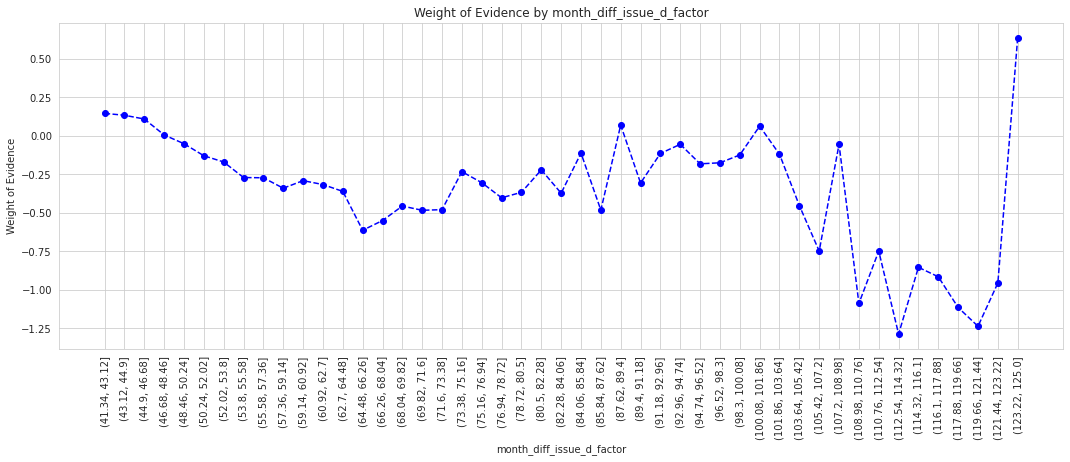

In [133]:
df_inputs['month_diff_issue_d_factor'] = pd.cut(df_inputs['month_diff_issue_d'], 50)
df_temp = get_woe_continuous(df_inputs, 'month_diff_issue_d_factor', df_targets)
plot_by_woe(df_temp.iloc[3: , : ], 90)

In [0]:
# We create the following categories:
# < 38, 38 - 41,42 - 50, 51 - 57, 
# reference categor >65.
df_inputs['month_diff_issue_d:<38'] = np.where(df_inputs['month_diff_issue_d'].isin(range(38)), 1, 0)
df_inputs['month_diff_issue_d:38-40'] = np.where(df_inputs['month_diff_issue_d'].isin(range(38, 41)), 1, 0)
df_inputs['month_diff_issue_d:41-42'] = np.where(df_inputs['month_diff_issue_d'].isin(range(41, 43)), 1, 0)
df_inputs['month_diff_issue_d:42-48'] = np.where(df_inputs['month_diff_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs['month_diff_issue_d:49-52'] = np.where(df_inputs['month_diff_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs['month_diff_issue_d:52-65'] = np.where(df_inputs['month_diff_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs['month_diff_issue_d:>65'] = np.where(df_inputs['month_diff_issue_d'].isin(range(65, int(df_inputs['month_diff_issue_d'].max()))), 1, 0)

**Observation:** There are 91 distinct value so we can easily treat them as categories.On the other hand it's much better to work with less than 50 fine class categories when doing course classing.So, we first defined classing of the values of the months in terms of  issue date variable.Roughly grouped them into categories. From observing df_temp, the value from 97 and greater had very less observation and therefore is a small portion of data. Hence, this is the potential reason for such haphazard graph.

 So, in total, we are keeping everything above 65 as one reference category for extra conservative risk management approach.


#### **ii) Interest Rate:** 

---





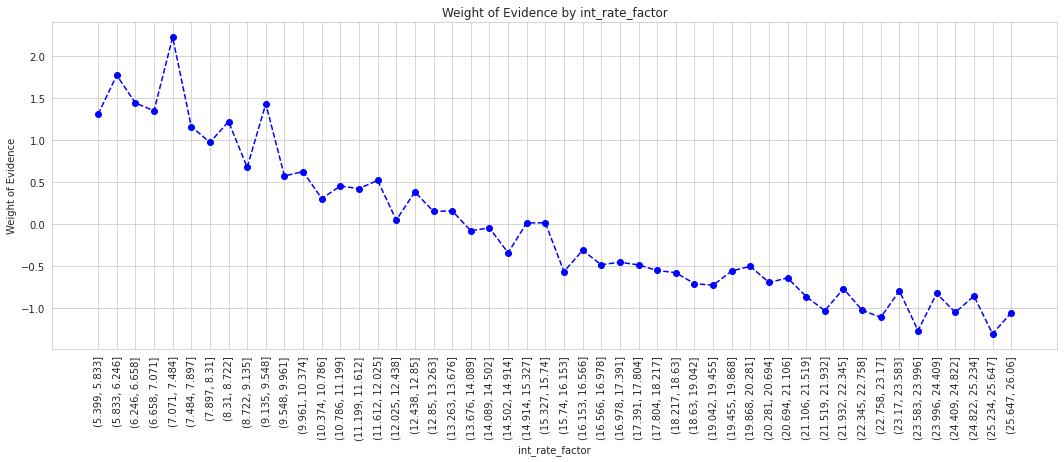

In [135]:
df_inputs['int_rate_factor'] = pd.cut(df_inputs['int_rate'], 50)
df_temp = get_woe_continuous(df_inputs, 'int_rate_factor', df_targets)
plot_by_woe(df_temp, 90)

In [0]:
# categories , <9.548, '9.548-12.025' ,'12.025-15.74','15.74-20.281',
# reference category >'19.455'
df_inputs['int_rate:<9.548'] = np.where((df_inputs['int_rate'] <= 9.548), 1, 0)
df_inputs['int_rate:9.548-12.025'] = np.where((df_inputs['int_rate'] > 9.548) & (df_inputs['int_rate'] <= 12.025), 1, 0)
df_inputs['int_rate:12.025-15.74'] = np.where((df_inputs['int_rate'] > 12.025) & (df_inputs['int_rate'] <= 15.74), 1, 0)
df_inputs['int_rate:15.74-20.281'] = np.where((df_inputs['int_rate'] > 15.74) & (df_inputs['int_rate'] <= 20.281), 1, 0)
df_inputs['int_rate:>20.281'] = np.where((df_inputs['int_rate'] > 20.281), 1, 0)

**Observation:** We have cut it into 50 categories. From the graph above we can see the greater the interest rate,the lower the weight of evidence. Thus, We put everything less than 9.548 is one bin because it has very less obsservation(5%approx). 

#### **iii) Funded Amount:**

---



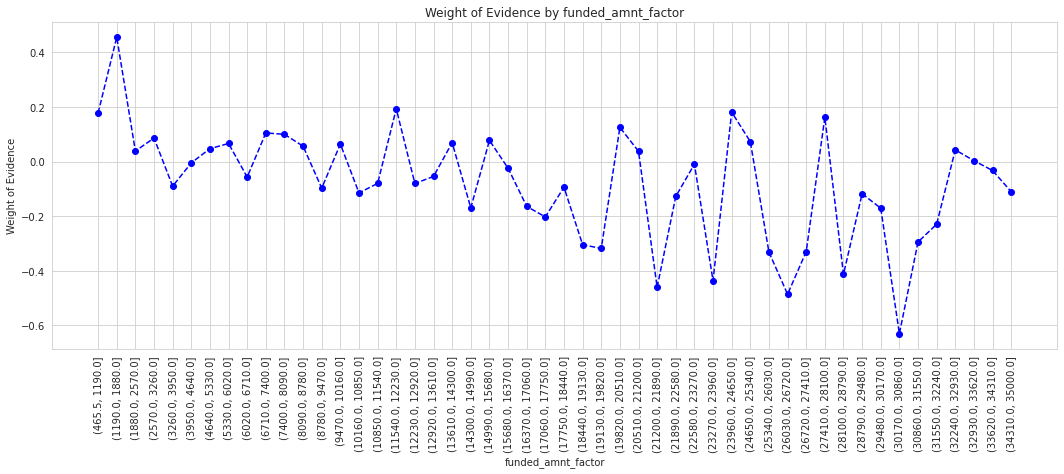

In [137]:
df_inputs['funded_amnt_factor'] = pd.cut(df_inputs['funded_amnt'], 50)
df_temp = get_woe_continuous(df_inputs, 'funded_amnt_factor', df_targets)
plot_by_woe(df_temp, 90)

#### **iv) Earliest Reported Credit Line:**

---



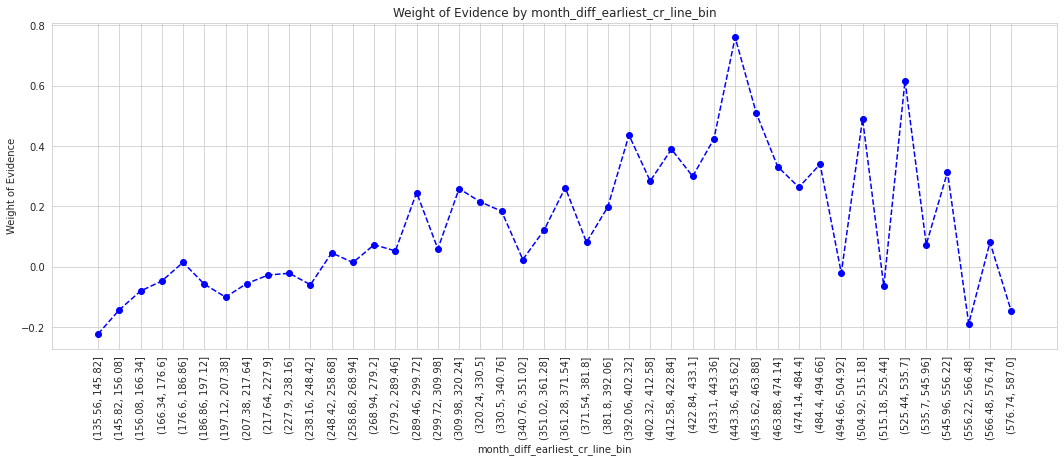

In [138]:
df_inputs['month_diff_earliest_cr_line_bin'] = pd.cut(df_inputs['month_diff_earliest_cr_line'], 50)
df_temp = get_woe_continuous(df_inputs, 'month_diff_earliest_cr_line_bin', df_targets)
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [0]:
df_inputs['month_diff_earliest_cr_line:<141'] = np.where(df_inputs['month_diff_earliest_cr_line'].isin(range(141)), 1, 0)
df_inputs['month_diff_earliest_cr_line:142-247'] = np.where(df_inputs['month_diff_earliest_cr_line'].isin(range(140, 248)), 1, 0)
df_inputs['month_diff_earliest_cr_line:248-271'] = np.where(df_inputs['month_diff_earliest_cr_line'].isin(range(248, 272)), 1, 0)
df_inputs['month_diff_earliest_cr_line:272-353'] = np.where(df_inputs['month_diff_earliest_cr_line'].isin(range(272, 354)), 1, 0)
df_inputs['month_diff_earliest_cr_line:>353'] = np.where(df_inputs['month_diff_earliest_cr_line'].isin(range(354, int(df_inputs['month_diff_earliest_cr_line'].max()))), 1, 0)

**Observation:** The first 6 rows is df_temp does not have any information or observation to calculate weight of evidence.Hence , we will categorze them in single dummy variable.

#### **v) Delinquincy for past 2 years:**

---




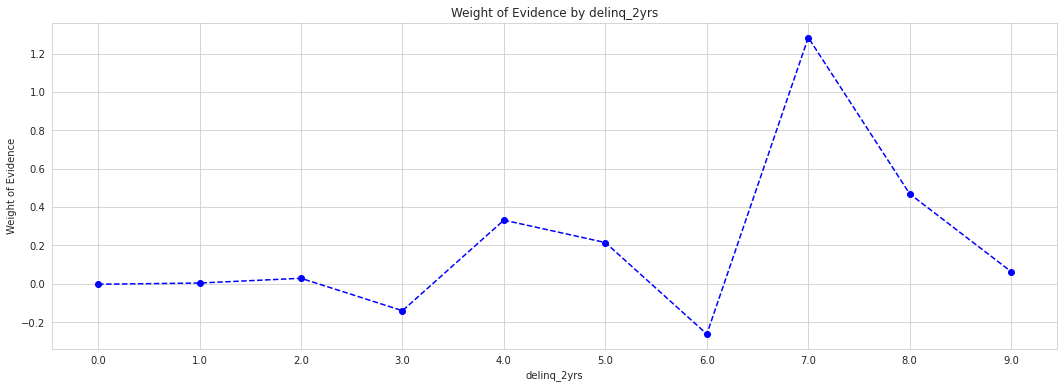

In [140]:
df_temp = get_woe_continuous(df_inputs, 'delinq_2yrs', df_targets)
plot_by_woe(df_temp)

In [0]:
# Categories: 0, 1-2, >=2
df_inputs['delinq_2yrs:0'] = np.where((df_inputs['delinq_2yrs'] == 0), 1, 0)
df_inputs['delinq_2yrs:1-2'] = np.where((df_inputs['delinq_2yrs'] >= 1) & (df_inputs['delinq_2yrs'] < 2), 1, 0)
df_inputs['delinq_2yrs:>=2'] = np.where((df_inputs['delinq_2yrs'] >= 2), 1, 0)

#### **vi) Number of Inquiries in last 6 months:**

---



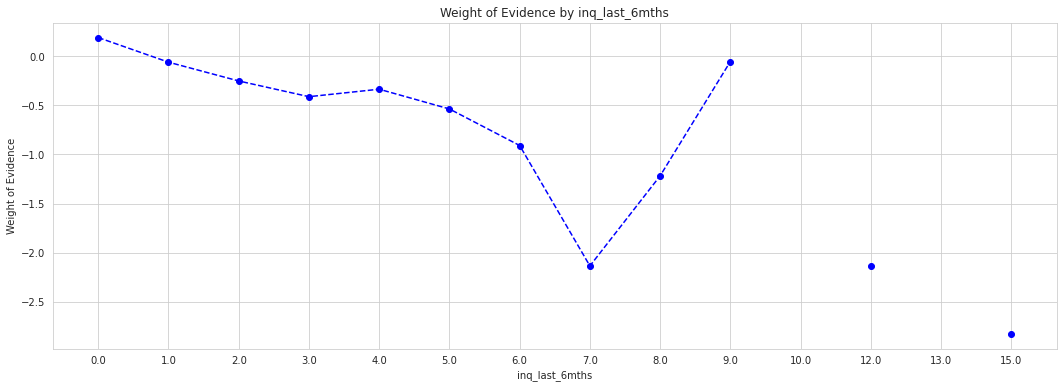

In [142]:
df_temp = get_woe_continuous(df_inputs, 'inq_last_6mths', df_targets)
plot_by_woe(df_temp)

In [0]:
# Categories: 0, 1, 2, 3, > 3
df_inputs['inq_last_6mths:0'] = np.where((df_inputs['inq_last_6mths'] == 0), 1, 0)
df_inputs['inq_last_6mths:1'] = np.where((df_inputs['inq_last_6mths'] == 1), 1, 0)
df_inputs['inq_last_6mths:2'] = np.where((df_inputs['inq_last_6mths'] == 2), 1, 0)
df_inputs['inq_last_6mths:3'] = np.where((df_inputs['inq_last_6mths'] == 3), 1, 0)
df_inputs['inq_last_6mths:>3'] = np.where((df_inputs['inq_last_6mths'] > 3), 1, 0)

#### **vii) Open Account:**

---





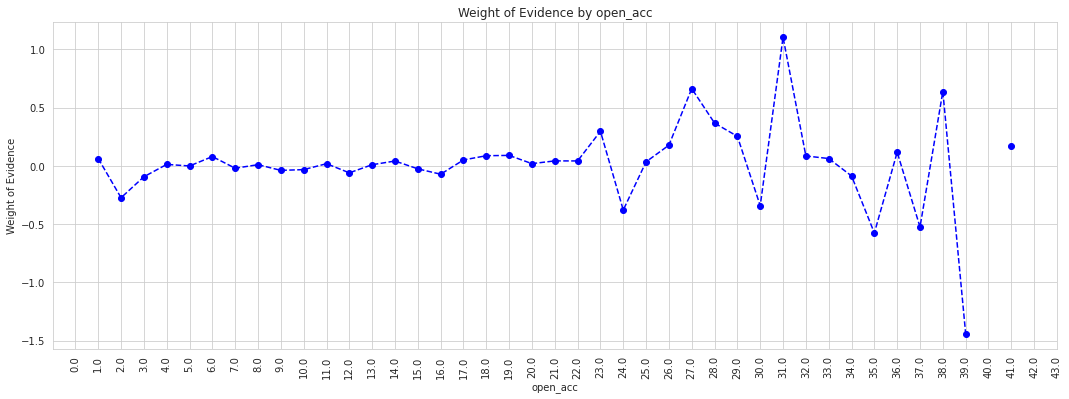

In [144]:
df_temp = get_woe_continuous(df_inputs, 'open_acc', df_targets)
plot_by_woe(df_temp, 90)

In [0]:
# Categories: '0-3','4-12', '13-17', '18-24', '>25'
df_inputs['open_acc:0-3'] = np.where((df_inputs['open_acc'] >= 0) & (df_inputs['open_acc'] <= 3), 1, 0)
df_inputs['open_acc:4-12'] = np.where((df_inputs['open_acc'] >= 4) & (df_inputs['open_acc'] <= 12), 1, 0)
df_inputs['open_acc:13-17'] = np.where((df_inputs['open_acc'] >= 13) & (df_inputs['open_acc'] <= 17), 1, 0)
df_inputs['open_acc:18-24'] = np.where((df_inputs['open_acc'] >= 18) & (df_inputs['open_acc'] <= 24), 1, 0)
df_inputs['open_acc:>=25'] = np.where((df_inputs['open_acc'] >= 25), 1, 0)

#### **viii) Public Record:**

---



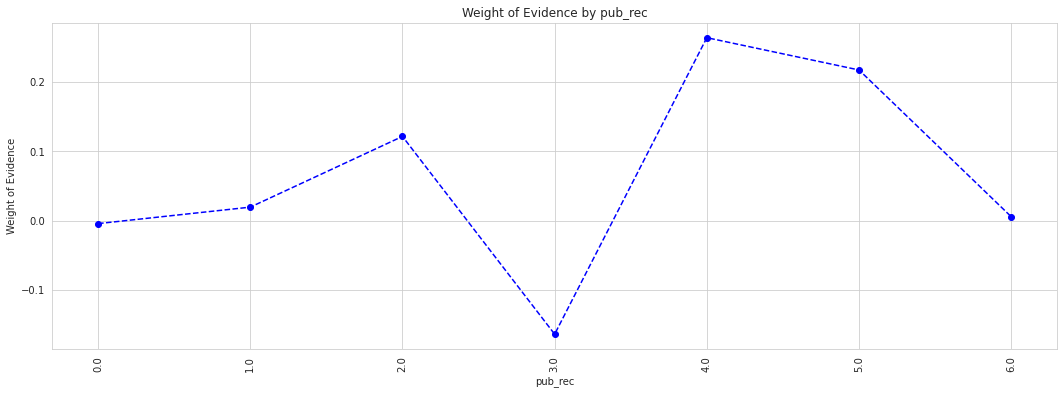

In [146]:
df_temp = get_woe_continuous(df_inputs, 'pub_rec', df_targets)
plot_by_woe(df_temp, 90)

In [0]:
# Categories '0', '1', '>=2'
df_inputs['pub_rec:0'] = np.where((df_inputs['pub_rec'] == 0), 1, 0)
df_inputs['pub_rec:1'] = np.where((df_inputs['pub_rec'] == 1), 1, 0)
df_inputs['pub_rec:>=2'] = np.where((df_inputs['pub_rec'] >= 2), 1, 0)

#### **xi) Total Credit Account Factor:**

---


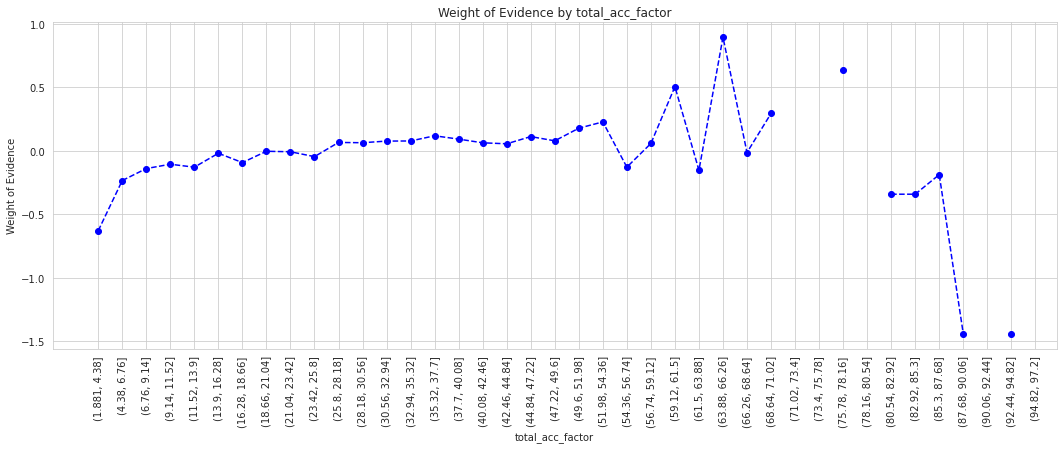

In [148]:

df_inputs['total_acc_factor'] = pd.cut(df_inputs['total_acc'], 50)
df_temp = get_woe_continuous(df_inputs, 'total_acc_factor', df_targets)
plot_by_woe(df_temp, 90)

In [0]:
# Categories: '<=10','11-16', '17-22','23-50', '>51'
df_inputs['total_acc:<=10'] = np.where((df_inputs['total_acc'] <= 10), 1, 0)
df_inputs['total_acc:11-16'] = np.where((df_inputs['total_acc'] >= 11) & (df_inputs['total_acc'] <= 16), 1, 0)
df_inputs['total_acc:17-22'] = np.where((df_inputs['total_acc'] >= 17) & (df_inputs['total_acc'] <= 22), 1, 0)
df_inputs['total_acc:23-50'] = np.where((df_inputs['total_acc'] >= 23) & (df_inputs['total_acc'] <= 50), 1, 0)
df_inputs['total_acc:>=51'] = np.where((df_inputs['total_acc'] >= 51), 1, 0)

#### **x) Borrower's Delinquint Accounts:**

---





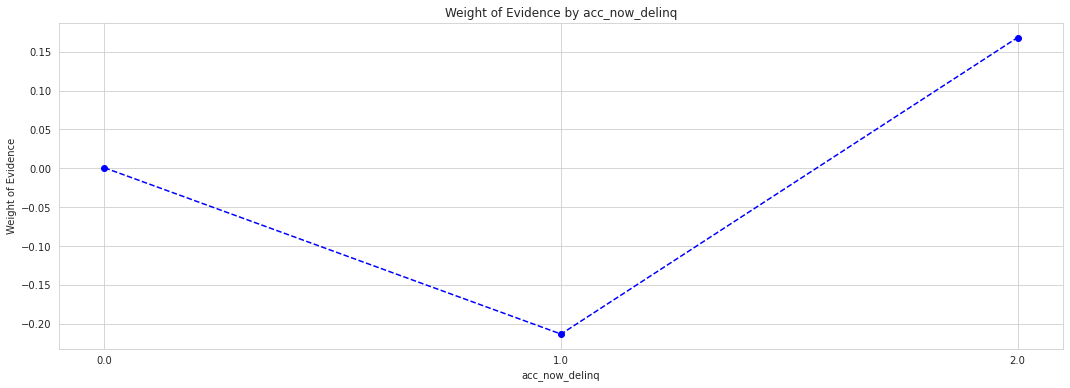

In [150]:
df_temp = get_woe_continuous(df_inputs, 'acc_now_delinq', df_targets)
plot_by_woe(df_temp)

In [0]:
# Categories: '0', '>=1'
df_inputs['acc_now_delinq:0'] = np.where((df_inputs['acc_now_delinq'] == 0), 1, 0)
df_inputs['acc_now_delinq:>=1'] = np.where((df_inputs['acc_now_delinq'] >= 1), 1, 0)

#### **xi) Total revolving high Credit Limit:**

---




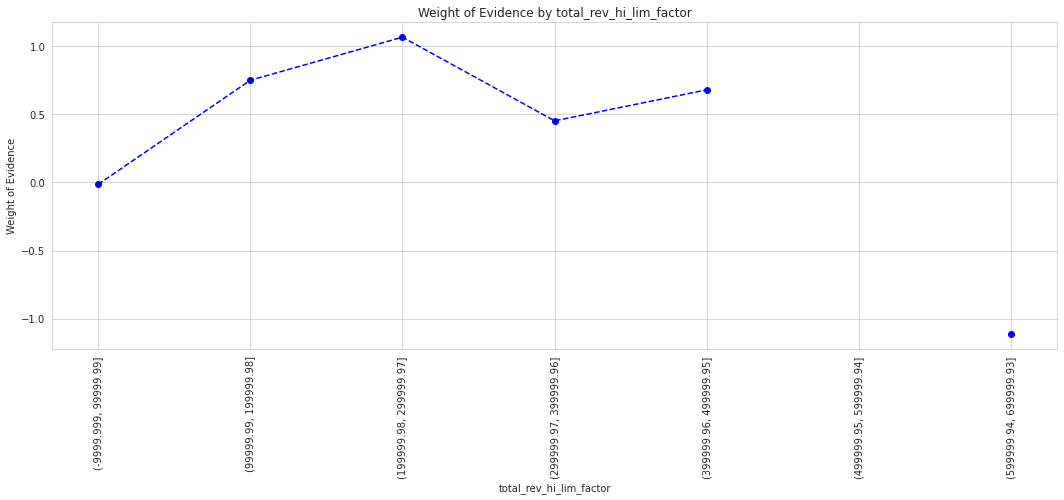

In [152]:
df_inputs['total_rev_hi_lim_factor'] = pd.cut(df_inputs['total_rev_hi_lim'], 100)
df_temp = get_woe_continuous(df_inputs, 'total_rev_hi_lim_factor', df_targets)
plot_by_woe(df_temp, 90)

In [0]:
# Categories
# '<=10K', '10K-20K', '20K-30K', '30K-40K', '40K-50K', '50K-60K', '60K-100K', '>100K'
df_inputs['total_rev_hi_lim:<=10K'] = np.where((df_inputs['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs['total_rev_hi_lim:10K-20K'] = np.where((df_inputs['total_rev_hi_lim'] > 10000) & (df_inputs['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs['total_rev_hi_lim:20K-30K'] = np.where((df_inputs['total_rev_hi_lim'] > 20000) & (df_inputs['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs['total_rev_hi_lim:30K-40K'] = np.where((df_inputs['total_rev_hi_lim'] > 30000) & (df_inputs['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs['total_rev_hi_lim:40K-50K'] = np.where((df_inputs['total_rev_hi_lim'] > 40000) & (df_inputs['total_rev_hi_lim'] <= 50000), 1, 0)
df_inputs['total_rev_hi_lim:50K-60K'] = np.where((df_inputs['total_rev_hi_lim'] > 50000) & (df_inputs['total_rev_hi_lim'] <= 60000), 1, 0)
df_inputs['total_rev_hi_lim:60K-100K'] = np.where((df_inputs['total_rev_hi_lim'] > 60000) & (df_inputs['total_rev_hi_lim'] <= 100000), 1, 0)
df_inputs['total_rev_hi_lim:>100K'] = np.where((df_inputs['total_rev_hi_lim'] > 100000), 1, 0)

#### **xii) Annul Income:**

---


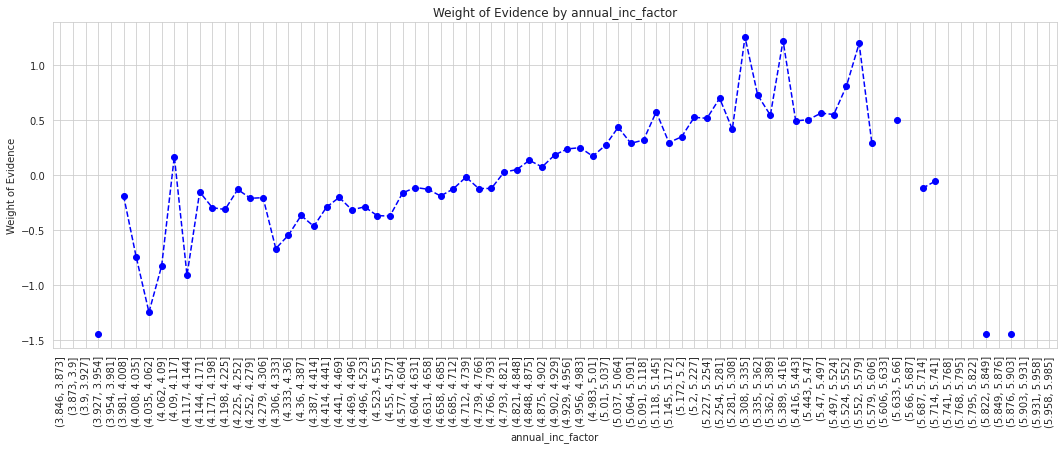

In [154]:
df_inputs['annual_inc_factor'] = pd.cut(df_inputs['annual_inc'], 100)
df_temp = get_woe_continuous(df_inputs, 'annual_inc_factor', df_targets)
plot_by_woe(df_temp, 90)

In [0]:
df_inputs['annual_inc:<77K'] = np.where((df_inputs['annual_inc'] <= 77000), 1, 0)
df_inputs['annual_inc:77K-152K'] = np.where((df_inputs['annual_inc'] > 77000) & (df_inputs['annual_inc'] <= 152000), 1, 0)
df_inputs['annual_inc:>152K'] = np.where((df_inputs['annual_inc'] > 152000), 1, 0)

#### **xiii) Month since Last delinquincy:**

---



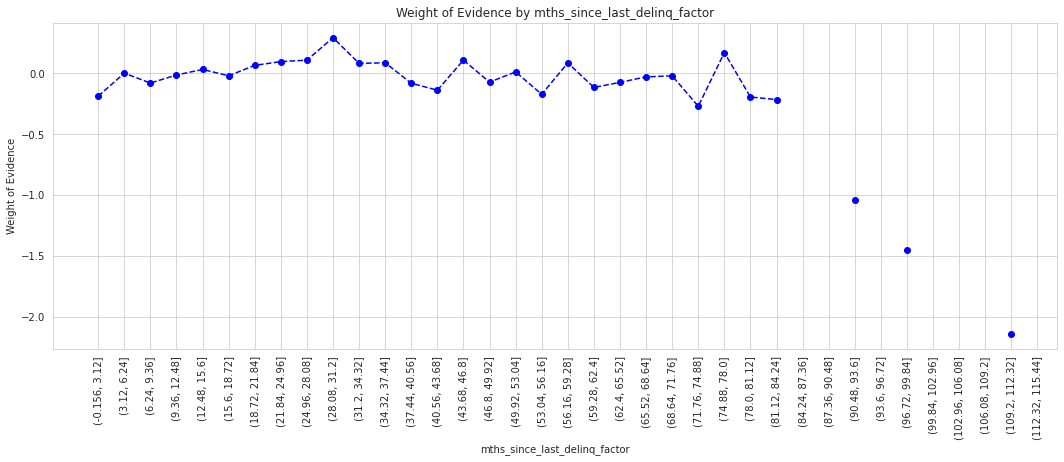

In [156]:
df_inputs_temp = df_inputs[pd.notnull(df_inputs['mths_since_last_delinq'])]
df_inputs_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_temp['mths_since_last_delinq'], 50)
df_temp = get_woe_continuous(df_inputs_temp, 'mths_since_last_delinq_factor', df_targets)
plot_by_woe(df_temp,90)

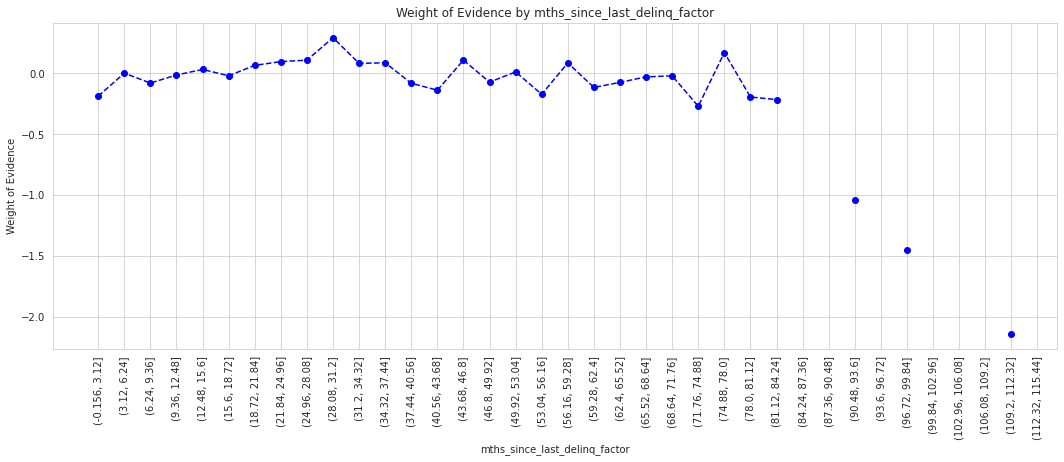

In [157]:
df_inputs_temp = df_inputs[pd.notnull(df_inputs['mths_since_last_delinq'])]
df_inputs_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_temp['mths_since_last_delinq'], 50)
df_temp = get_woe_continuous(df_inputs_temp, 'mths_since_last_delinq_factor', df_targets)
plot_by_woe(df_temp, 90)

In [0]:
df_inputs['mths_since_last_delinq:Null'] = np.where((df_inputs['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs['mths_since_last_delinq:0-4'] = np.where((df_inputs['mths_since_last_delinq'] >= 0) & (df_inputs['mths_since_last_delinq'] <= 4), 1, 0)
df_inputs['mths_since_last_delinq:4-8'] = np.where((df_inputs['mths_since_last_delinq'] > 4) & (df_inputs['mths_since_last_delinq'] <= 8), 1, 0)
df_inputs['mths_since_last_delinq:8-80'] = np.where((df_inputs['mths_since_last_delinq'] > 8) & (df_inputs['mths_since_last_delinq'] <= 80), 1, 0)
df_inputs['mths_since_last_delinq:>=80'] = np.where((df_inputs['mths_since_last_delinq'] > 80), 1, 0)

#### **xiv) Debt to Income Ration:**

---


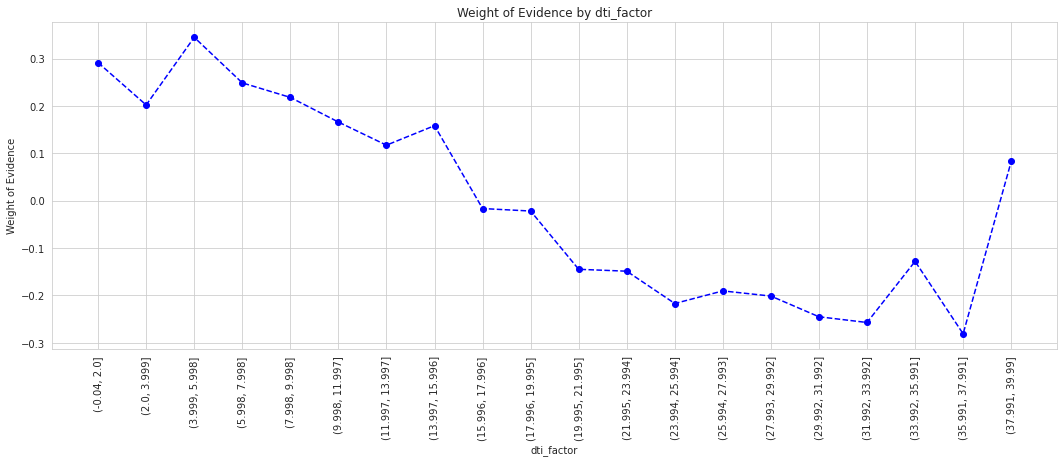

In [159]:
df_inputs['dti_factor'] = pd.cut(df_inputs['dti'], 20)
df_temp = get_woe_continuous(df_inputs, 'dti_factor', df_targets)
plot_by_woe(df_temp,90)

In [0]:
# Categories:
df_inputs['dti:<=4'] = np.where((df_inputs['dti'] <= 1.4), 1, 0)
df_inputs['dti:1.4-3.5'] = np.where((df_inputs['dti'] > 1.4) & (df_inputs['dti'] <= 3.5), 1, 0)
df_inputs['dti:3.5-7.7'] = np.where((df_inputs['dti'] > 3.5) & (df_inputs['dti'] <= 7.7), 1, 0)
df_inputs['dti:7.7-10.5'] = np.where((df_inputs['dti'] > 7.7) & (df_inputs['dti'] <= 10.5), 1, 0)
df_inputs['dti:10.5-16.1'] = np.where((df_inputs['dti'] > 10.5) & (df_inputs['dti'] <= 16.1), 1, 0)
df_inputs['dti:16.1-20.3'] = np.where((df_inputs['dti'] > 16.1) & (df_inputs['dti'] <= 20.3), 1, 0)
df_inputs['dti:20.3-21.7'] = np.where((df_inputs['dti'] > 20.3) & (df_inputs['dti'] <= 21.7), 1, 0)
df_inputs['dti:21.7-22.4'] = np.where((df_inputs['dti'] > 21.7) & (df_inputs['dti'] <= 22.4), 1, 0)
df_inputs['dti:22.4-35'] = np.where((df_inputs['dti'] > 22.4) & (df_inputs['dti'] <= 35), 1, 0)
df_inputs['dti:>35'] = np.where((df_inputs['dti'] > 35), 1, 0)

As we can se below the loan amount plot has lot of ups and down. Therefore, it is not a reliable variable for prediction

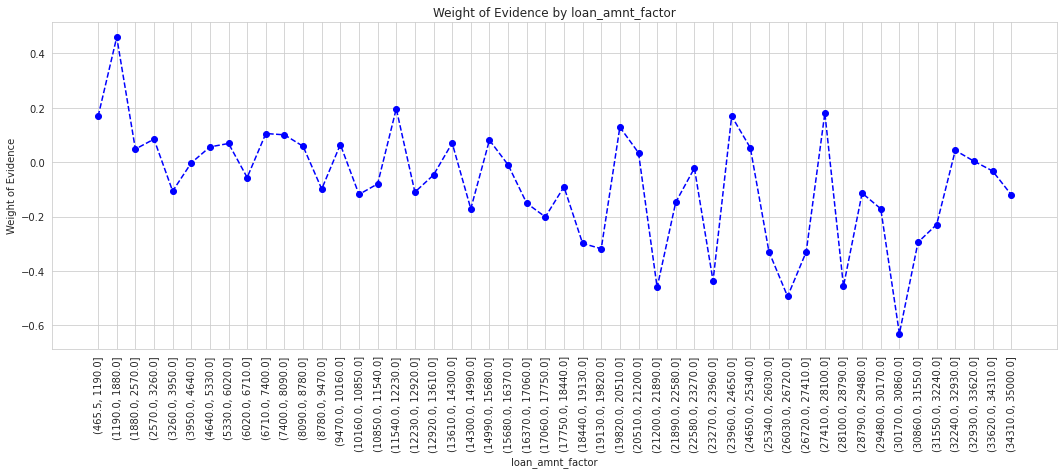

In [162]:
df_inputs['loan_amnt_factor'] = pd.cut(df_inputs['loan_amnt'], 50)
df_temp = get_woe_continuous(df_inputs, 'loan_amnt_factor', df_targets)
df_temp
plot_by_woe(df_temp,90)


#### **xv) Term, Employee Length and Installment**

---



---



In [163]:
df_temp = get_woe_continuous(df_inputs, 'term', df_targets)
df_temp.head(1)

,term,total_obs,prop_good,prop_total_obs,total_good,total_bad,prop_total_good,prop_total_bad,WoE,IV
0,36,57735,0.90588,0.712971,52301.0,5434.0,0.72229,0.63422,0.13003,0.035711


In [164]:
df_temp = get_woe_continuous(df_inputs, 'emp_length', df_targets)
df_temp.head(1)

,emp_length,total_obs,prop_good,prop_total_obs,total_good,total_bad,prop_total_good,prop_total_bad,WoE,IV
0,0.0,6066,0.888229,0.078432,5388.0,678.0,0.077831,0.083559,-0.071018,0.006219


In [165]:
df_inputs['installment_factor'] = pd.cut(df_inputs['installment'], 50)
df_temp = get_woe_continuous(df_inputs, 'installment_factor', df_targets)
df_temp.head(1)

,installment_factor,total_obs,prop_good,prop_total_obs,total_good,total_bad,prop_total_good,prop_total_bad,WoE,IV
0,"(15.355, 44.224]",204,0.916667,0.002519,187.0,17.0,0.002583,0.001984,0.263585,0.016523


**Observation:** The 3 features all have very weak predicting power based on Information Value(IV). Thus, we are ignoring them.

###**c)Test Data Preparation:**

---
In order to test the model with the test set, we must have the same dummy variable as in the train set. Thus we will have to rerun entire DATA PREPARATION code for test data

<font color='red'>**Note: Please rerun the entire DATA PREPARATION section again for test data, starting after the TRAIN AND TEST SPLIT**</font> 

## **VI. FEATURE SELECTION FOR MODEL BUILDING:**

---

In [0]:
# Categories which we categorised using WOE
dummy_cols = ['grade:A','grade:B','grade:C','grade:D','grade:E','grade:F','grade:G','home_ownership:RENT_OTHER_NONE','home_ownership:OWN','home_ownership:MORTGAGE','addr_state:NE_IA_NV_FL_HI_AL','addr_state:NY_MO_MD_NJ_CA_LA_RI_VA','addr_state:UT_NC_AR_AZ_PA_DE_TN_OH_SD','addr_state:MI_IN_MN_KY_WI_MA_GA_WA_OR','addr_state:SC_VT_KS_IL_CO_MT_CT_AK_WV','addr_state:ME_ID_DC','addr_state:MS_WY_NH','addr_state:TX','month_diff_issue_d:<38','month_diff_issue_d:38-40','month_diff_issue_d:41-42','month_diff_issue_d:42-48','month_diff_issue_d:49-52','month_diff_issue_d:52-65','month_diff_issue_d:>65','int_rate:<9.548','int_rate:9.548-12.025','int_rate:12.025-15.74','int_rate:15.74-20.281','int_rate:>20.281','month_diff_earliest_cr_line:<141','month_diff_earliest_cr_line:142-247','month_diff_earliest_cr_line:248-271','month_diff_earliest_cr_line:272-353','month_diff_earliest_cr_line:>353','delinq_2yrs:0','delinq_2yrs:>=2','delinq_2yrs:1-2','inq_last_6mths:0','inq_last_6mths:1','inq_last_6mths:2','inq_last_6mths:3','inq_last_6mths:>3','open_acc:0-3','open_acc:4-12','open_acc:13-17','open_acc:18-24','open_acc:>=25','pub_rec:0','pub_rec:1','pub_rec:>=2','total_acc:<=10','total_acc:11-16','total_acc:17-22','total_acc:23-50','total_acc:>=51','acc_now_delinq:0','acc_now_delinq:>=1','total_rev_hi_lim:<=10K','total_rev_hi_lim:10K-20K','total_rev_hi_lim:20K-30K','total_rev_hi_lim:30K-40K','total_rev_hi_lim:40K-50K','total_rev_hi_lim:50K-60K','total_rev_hi_lim:60K-100K','total_rev_hi_lim:>100K','annual_inc:<77K','annual_inc:77K-152K','annual_inc:>152K','mths_since_last_delinq:Null','mths_since_last_delinq:0-4','mths_since_last_delinq:4-8','mths_since_last_delinq:8-80','mths_since_last_delinq:>=80','dti:<=4','dti:1.4-3.5','dti:3.5-7.7','dti:7.7-10.5','dti:10.5-16.1','dti:16.1-20.3','dti:20.3-21.7','dti:21.7-22.4','dti:22.4-35','dti:>35'
]
#Reference category
ref_cols = ['grade:G','home_ownership:RENT_OTHER_NONE','addr_state:NE_IA_NV_FL_HI_AL','verification_status:Verified','purpose:educ_small_other_moving_ren_house','term:60','emp_length:0','month_diff_issue_d:>65','int_rate:>20.281','mths_since_earliest_cr_line:<141','delinq_2yrs:>=2','inq_last_6mths:>3','open_acc:>=25','pub_rec:0','total_acc:<=10','acc_now_delinq:>=1','total_rev_hi_lim:>100K','installment:>=211','annual_inc:<64K','mths_since_last_delinq:0-4','dti:>35']

Below we will subtract ref_cols from dummy_cols in order to avoid dummy Traps. Dummy Traps is a scenario in which the independent variables are multicollinear; - a scenario in which two or more variables are highly correlated; in simple terms one variable can be predicted from the others. Please refer to the link in reference to know more about Dummy Traps.

In [0]:
input_cols = list(filter(lambda x: (x not in ref_cols), dummy_cols))

**Training Dataset**

In [0]:
#Please comment this section while running test data set
X_train = df_inputs.loc[:, input_cols]
Y_train = loan_data_targets_train

In [0]:
#Please comment this section while running test data set
X_train.to_csv('X_train.csv', index = False)
Y_train.to_csv('Y_train.csv', index = False)


**Testing Dataset (UN-COMMENT WHEN RUNNING TEST DATA)** 

<font color='red'>**Note: Please rerun the entire DATA PREPARATION section again for test data, starting after the TRAIN AND TEST SPLIT**</font> 

<font color='red'>**Please UNCOMMENT the below section before running the test data**</font>

In [0]:
#Please UNCOMMENT this section while running test data set
#X_test = df_inputs.loc[:, input_cols]
#Y_test = loan_data_targets_test

In [0]:
#Please UNCOMMENT this section while running test data set
#X_test.to_csv('X_test.csv', index = False)
#Y_test.to_csv('Y_test.csv', index = False)

In [0]:
#Please uncomment before running the test data.
import numpy as np
import pandas as pd
X_train = pd.read_csv('X_train.csv')
#X_test = pd.read_csv('X_test.csv')
Y_train = pd.read_csv('Y_train.csv')
#Y_test = pd.read_csv('Y_test.csv')

In [171]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(323911, 70)
(323911, 1)
(80978, 70)
(80978, 1)


## **VII. MODELLING**

---



We have chosen three classification models - 

1. Logistic Regression, 

2. Naive Bayes and 

3. Decision Tree model.

### **Model 1: Logistic Regression** 

---



---



In [0]:
from sklearn.linear_model import LogisticRegression

In [173]:
logit_model = LogisticRegression(solver = 'lbfgs', max_iter=1000)
logit_model.fit(X_train,Y_train['good_bad'].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
logit_model.score(X_test.values, Y_test['good_bad'].values)

0.8941934846501519

#### **Model Evaluation - Cross-validation**

In [175]:
cv_score_list = []
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(LogisticRegression(solver = 'lbfgs', max_iter=1000),X_train.values,Y_train['good_bad'].values,cv=5).mean()
cv_score_list.append(cv_score)
print(str(cv_score))

0.8947643025644766


###**Model 2: Naive Bayes**

---



---



In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
skl_gnb = GaussianNB().fit(X_train.values,Y_train['good_bad'].values)

In [180]:
skl_gnb.score(X_test.values, Y_test['good_bad'].values)

0.684531601175628

#### **Model Evaluation- Cross Validation**

In [181]:
cv_score = cross_val_score(GaussianNB(),X_train.values,Y_train['good_bad'].values,cv=5).mean()
cv_score_list.append(cv_score)
print(str(cv_score))

0.6857655321174814


### **Model 3:DecisionTree Classifier**

---



---



In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
max_features = [1,2,3,4,5,6,'auto','log2'] 

In [0]:
scores_dt = pd.DataFrame(index=np.arange(len(max_depths)), columns=np.arange(len(max_features)))
for i in range(0,len(max_depths)):
    for j in range(0,len(max_features)):
        scores_dt.iloc[i,j] = cross_val_score(DecisionTreeClassifier(max_depth=max_depths[i], max_features = max_features[j]),
                                           X_train.values,Y_train['good_bad'].values,cv=5).mean()

 Fine tuning max_depth and max_features parameters for the decision tree model.

,1,2,3,4,5,6,auto,log2
max_depth,,,,,,,,
1.0,0.894764,0.894764,0.894764,0.894764,0.894764,0.894764,0.894764,0.894764
2.0,0.894764,0.894764,0.894764,0.894764,0.894764,0.894764,0.894764,0.894764
3.0,0.894764,0.894764,0.894764,0.894764,0.894764,0.894764,0.894764,0.894764
4.0,0.894764,0.894764,0.894764,0.894764,0.894764,0.894764,0.894764,0.894764
5.0,0.894764,0.894764,0.894764,0.894761,0.894764,0.894758,0.894767,0.894764
6.0,0.894758,0.894764,0.894761,0.894755,0.894727,0.894758,0.894767,0.894761
7.0,0.894755,0.894758,0.894724,0.89473,0.894715,0.894733,0.89474,0.894669
8.0,0.894737,0.894662,0.894669,0.894693,0.894709,0.894659,0.894632,0.894696
9.0,0.894684,0.894607,0.894619,0.894607,0.89465,0.894579,0.894505,0.894561


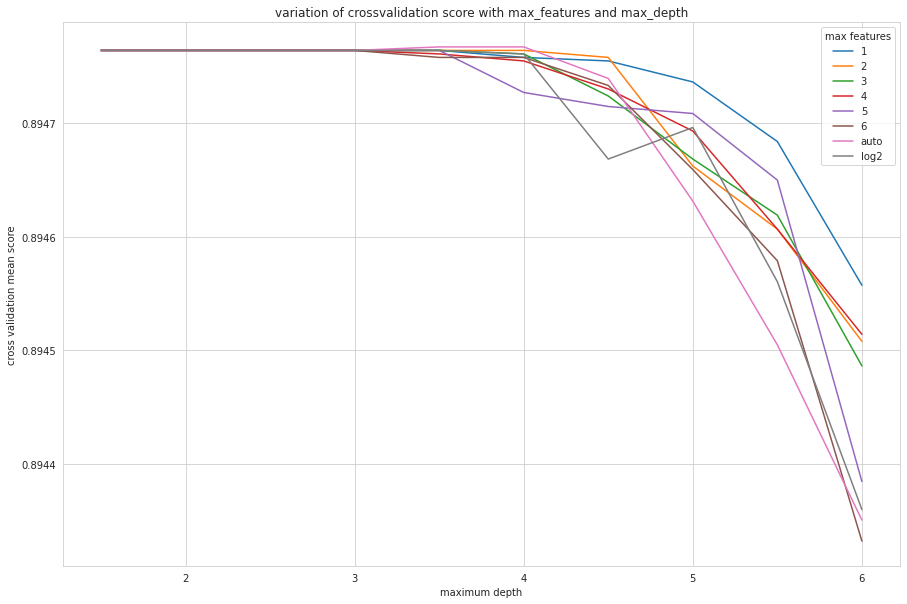

In [185]:
scores_dt['max_depth'] = max_depths
scores_dt.set_index('max_depth', inplace = True)
scores_dt.rename(columns={0:"1", 1: "2",2:"3",3:"4",4:"5",5:"6",6:"auto",7:"log2"}, inplace = True)
ax = scores_dt.plot(figsize = (15,10))
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None])
ax.set_xlabel("maximum depth")
ax.set_ylabel("cross validation mean score")
ax.set_title("variation of crossvalidation score with max_features and max_depth")
ax.legend(max_features, title = "max features")
scores_dt.max()
scores_dt

In [186]:
scores_dt.reset_index('max_depth', inplace = True)
scores_dt = scores_dt.apply(pd.to_numeric)
scores_dt.max()

max_depth    10.000000
1             0.894764
2             0.894764
3             0.894764
4             0.894764
5             0.894764
6             0.894764
auto          0.894767
log2          0.894764
dtype: float64

In [0]:
# We found the most optimal parameter setting is at max_depth = 4 and max_features = 4
skl_dt = DecisionTreeClassifier(max_depth=4, max_features = 4).fit(X_train.values,Y_train['good_bad'].values)

In [188]:
skl_dt.score(X_test.values, Y_test['good_bad'].values)

0.8941934846501519

#### **Model Evaluation: Cross Validation**

In [189]:
cv_score = cross_val_score(DecisionTreeClassifier(max_depth=4, max_features = 4),X_train.values,Y_train['good_bad'].values,cv=5).mean()
cv_score_list.append(cv_score)
print(str(cv_score))

0.8947643025644766


### **AUC Scores of all models**

---







####**Logistic Regression Model**

In [0]:
from sklearn.metrics import roc_curve, auc

In [191]:
auc_score_list = []
tpr_list = []
fpr, tpr, thresholds = roc_curve(Y_test['good_bad'].values, logit_model.predict_proba(X_test.values)[:, 1]) 
auc_score = auc(fpr, tpr)
auc_score_list.append(auc_score)
print("AUC Score for the Logistic Regression Model : " + str(auc_score))

AUC Score for the Logistic Regression Model : 0.6915733902777149


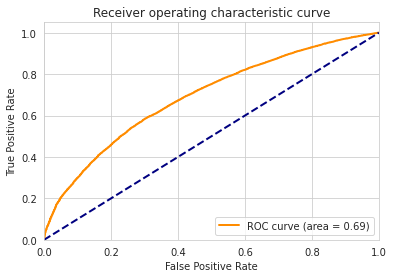

In [192]:
def PlotROC(fpr, tpr, auc_score):
    import matplotlib.pyplot as plt
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    
PlotROC(fpr,tpr, auc_score)

####**Naive Bayes:**

In [193]:
fpr, tpr, thresholds = roc_curve(Y_test['good_bad'].values, skl_gnb.predict_proba(X_test.values)[:, 1]) 
auc_score = auc(fpr, tpr)
auc_score_list.append(auc_score)
print("AUC Score for the Naive Bayes Model : " + str(auc_score))

AUC Score for the Naive Bayes Model : 0.6686509443578563


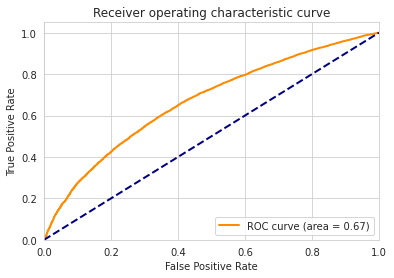

In [194]:
PlotROC(fpr,tpr, auc_score)

####**Decision Tree Classifer:**

In [195]:
fpr, tpr, thresholds = roc_curve(Y_test['good_bad'].values, skl_dt.predict_proba(X_test.values)[:, 1]) 
auc_score = auc(fpr, tpr)
auc_score_list.append(auc_score)
print("AUC Score for the Decision Tree Model : " + str(auc_score))


AUC Score for the Decision Tree Model : 0.5940467575190091


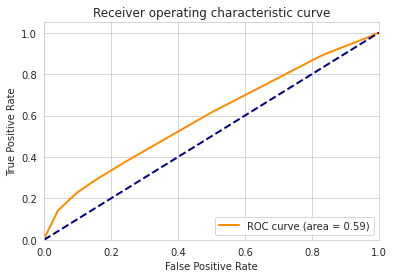

In [196]:
PlotROC(fpr,tpr, auc_score)

## **VIII. MODEL COMPARISON:**

---



In [197]:
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree']
d = {'Model': models , 'CV Score': cv_score_list, 'AUC Score' : auc_score_list} 
df = pd.DataFrame(data=d)
print(df)     

                 Model  CV Score  AUC Score
0  Logistic Regression  0.894764   0.691573
1          Naive Bayes  0.685766   0.668651
2        Decision Tree  0.894764   0.594047


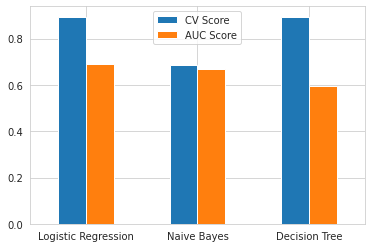

In [198]:
df = pd.DataFrame({'CV Score': cv_score_list,
                   'AUC Score': auc_score_list}, index=models)
ax = df.plot.bar(rot=0)

## **IX. CONCLUSION:**

---





A true positive in credit risk assessment is a measure of how many creditworthy applicants are correctly identified as creditworthy. Whereas, true negative is a measure of how many uncreditworthy applications are identified as uncreditworthy. A good model will result in a high number of true positives and true negatives. The higher the AUC, the better the model is at assessing creditworthiness. We note that, compared to other models, logistic regression has the highest AUC score as well as the highest CV Score. We also note that Naive Bayes model performed the worst since it has the lowest CV score. Though Decision tree has CV score similar to logistic regression model, it does not perform well when we consider the AUC score. Hence, we can conclude that logistic regression is the best model amongst all three models for predicting creditworthiness of a borrower.

## **REFERENCE:**

---



---



1. https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html 
2. https://medium.com/datadriveninvestor/dummy-variable-trap-c6d4a387f10a
3. https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html